## Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import seaborn as sns

AGRUPAMENTO, ANOMALIAS



Existem diferentes técnicas de clusterização que podemos classificar da seguinte forma:

* Abordagens baseadas em centroid, como Kmeans e Kmedoids
* Abordagens hierárquicas de agrupamento, como clusterização divisiva e de aglomeração
* Abordagens de clustering baseadas em distribuição, como modelos de mistura gaussiana
* Técnicas baseadas em densidade, como dbscan


# Kmeans


O Kmédias sistematiza a forma que identificamos grupos de dados. Grupos precisam ter seus elementos mais concentrados, mais próximos, mas também precisam estar distantes de outros grupos dos quais se diferenciam.

A ideia básica por trás do agrupamento Kmeans consiste em definir clusters de forma que a variação total dentro do cluster (*within-cluster-variation*) seja mínima. Existem vários algoritmos k-means disponíveis e o algoritmo padrão  define a variação total dentro do cluster como a soma das distâncias quadradas entre os itens e o centróide correspondente:

$$ Within(C_k) = \sum_{x_i \in C_k} || x_i - \mu_k ||^2$$

onde

$x_i$ é um ponto de dados pertencente ao cluster $C_k$
$\mu_k$ é *centróide*, o ponto médio dos elementos que pertencem ao cluster $C_k$

A variação total dos clusters é desse modo:      

$$  Within(C_k) = \sum_{k=1}^{k} W(C_k) = \sum_{k=1}^{k} \sum_{x_i \in C_k} || x_i - \mu_k ||^2$$

Queremos então minimizar a variação total intra-clusters:  

$$  \text{arg min}_C( Within(C_k) ) = \text{arg min}_C( \sum_{k=1}^{k} \sum_{x_i \in C_k} || x_i - \mu_k ||^2 )$$  




In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


In [3]:
# Prepara os dados de entrada do estimador
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Configura e instancia o estimador
clf = KMeans(n_clusters = 4 , random_state= 1984)  # seed, para a reprodutibilidade dos resultados

# Ajusta o estimador aos dados
clf.fit(X)

# Obtém os resultados do modelo
labels = clf.labels_
centroids = clf.cluster_centers_

print(labels)
print(centroids)

[2 3 0 3 2 2 1 0 3 3 1 3 0 3 2 0 0 2 1 1 2 2 0 1 1 0 2 0 1 0 3 3 0 3 3 3 3
 3 1 2 0 1 0 0 1 1 3 1 3 2 1 2 3 2 2 1 3 1 3 2 3 0 3 1 1 1 3 2 3 1 0 1 3 1
 1 3 1 0 2 3 2 0 2 2 3 0 2 0 3 3 0 2 3 1 1 0 2 2 0 1 3 2 3 2 0 2 2 0 3 0 1
 1 2 3 2 0 3 2 2 0 1 2 1 2 2 2 2 1 2 1 3 1 1 2 3 1 1 3 0 3 3 1 0 1 0 1 3 0
 3 3 3 0 3 0 2 1 3 1 2 0 3 0 0 2 0 1 1 0 2 0 0 3 2 0 1 3 2 2 0 1 2 0 1 1 0
 0 0 0 2 3 0 1 0 0 1 1 1 0 1 3 0 1 2 1 0 3 1 3 0 3 0 1 0 0 3 1 1 2 2 0 3 2
 2 1 2 1 0 3 3 0 0 3 0 2 1 0 2 1 3 1 2 0 2 3 3 3 3 1 1 3 0 1 2 0 1 1 1 2 2
 3 0 0 1 2 3 1 0 3 0 2 2 1 1 0 2 2 2 0 3 3 2 2 0 2 2 2 3 1 3 0 2 2 3 3 3 2
 2 0 3 1]
[[ 0.94973532  4.41906906]
 [-1.58438467  2.83081263]
 [ 1.98258281  0.86771314]
 [-1.37324398  7.75368871]]


## Visualizando os Clusteres

In [4]:
import matplotlib.pyplot as plt


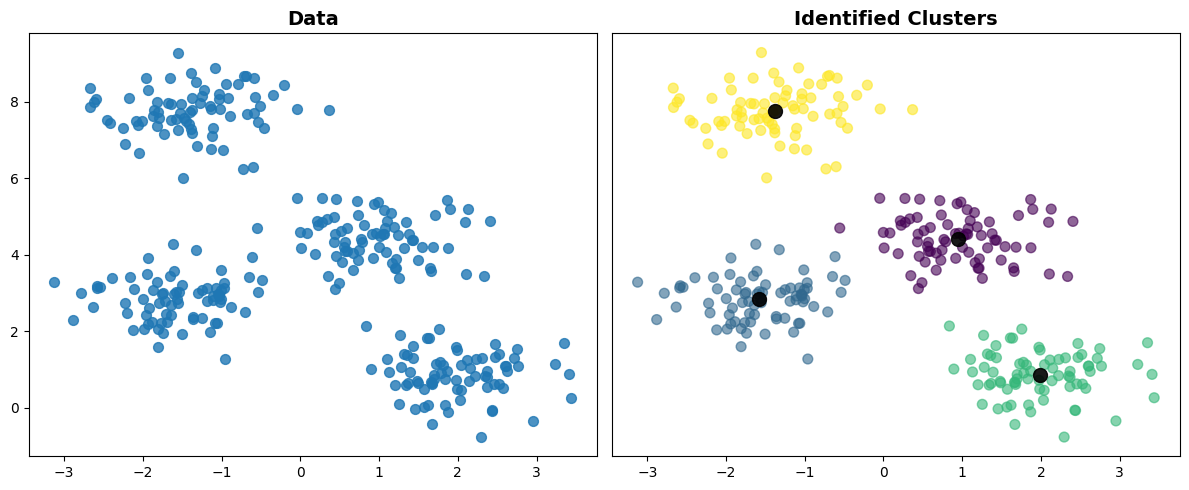

In [5]:
f = plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.8)
plt.title('Data', fontsize=14, weight='bold')

plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.6, c=labels)
plt.title('Identified Clusters', fontsize=14, weight='bold')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, alpha=0.9);
plt.yticks([])

plt.tight_layout()
plt.show()


Os dados encontram-se em escalas diferentes. O Kmeans emprega distância como medida de similaridade e é, portanto, sensível à normalização dos dados. Vamos assim normalizar os dados e empregaremos aqui o método `StandardScaler` que normaliza os dados com média zero e desvio padrão $1$ ($z$-score).

$$ z_i = \frac{x_i - \mu}{\sigma(x)} $$

## Exemplo

In [6]:
df= pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/USArrests.csv',index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [7]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


Os dados encontram-se em escalas diferentes. O Kmeans emprega distância como medida de similaridade e é, portanto, sensível à normalização dos dados. Vamos assim normalizar os dados e empregaremos aqui o método `StandardScaler` que normaliza os dados com média zero e desvio padrão $1$ ($z$-score).

$$ z_i = \frac{x_i - \mu}{\sigma(x)} $$

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
X = scaler.transform(df)

X[0:10]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293]])

## Exemplo 2

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[['Murder', 'UrbanPop']])
X = scaler.transform(df[['Murder', 'UrbanPop']])

# Configura e instancia o estimador
clf = KMeans(n_clusters = 4 , random_state= 1984)  # seed, para a reprodutibilidade dos resultados

# Ajusta o estimador aos dados
clf.fit(X) # somente os atributos Murder e UrbanPop

# Obtém os resultados do modelo
labels = clf.labels_
centroids = clf.cluster_centers_

print(labels)
print(centroids)

[0 0 2 0 2 1 1 1 2 0 1 3 2 1 3 1 0 0 3 0 1 2 1 0 1 3 1 2 3 2 2 2 0 3 1 1 1
 1 1 0 3 0 2 1 3 1 1 3 1 1]
[[ 1.19825217 -0.7863109 ]
 [-0.5352834   0.43337823]
 [ 0.74030529  1.10682426]
 [-1.0975732  -1.23182081]]


In [10]:
df['Cluster'] = labels
df.head(10)

,Murder,Assault,UrbanPop,Rape,Cluster
rownames,,,,,
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,2
Colorado,7.9,204,78,38.7,1
Connecticut,3.3,110,77,11.1,1
Delaware,5.9,238,72,15.8,1
Florida,15.4,335,80,31.9,2


/tmp/ipykernel_228095/3223419927.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df.Murder[line], df.UrbanPop[line], df.index[line],


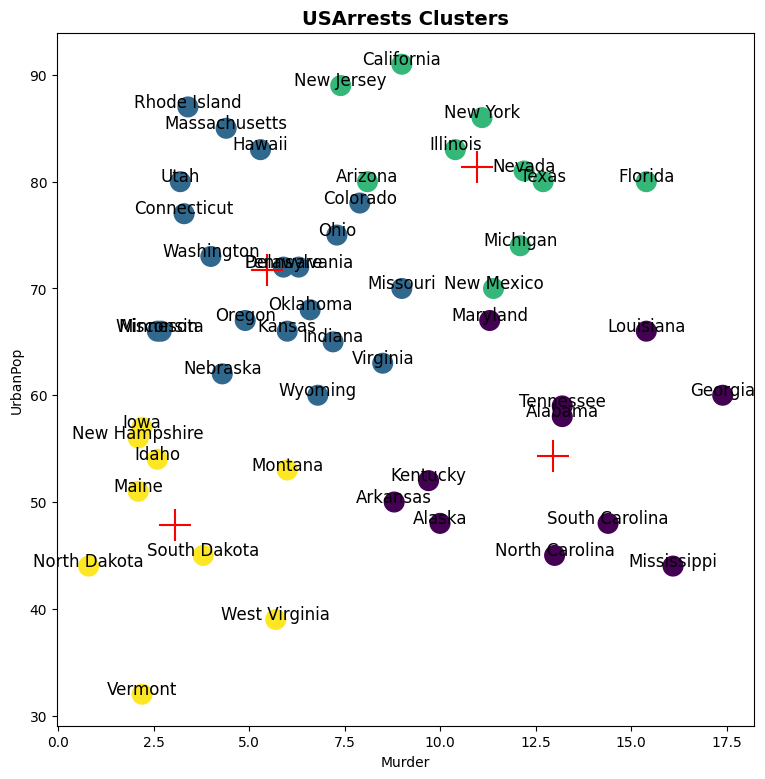

In [11]:
f = plt.figure(figsize=(9,9))

real_centroids = scaler.inverse_transform(centroids)

plt.scatter(x = 'Murder' ,y = 'UrbanPop' , data = df , c = labels , s = 200 )
plt.scatter(x = real_centroids[: , 0] , y =  real_centroids[: , 1] , s = 500 , c = 'red' , marker='+')

for line in range(0,df.shape[0]):
  plt.text(df.Murder[line], df.UrbanPop[line], df.index[line],
           horizontalalignment='center',
           size='large',
           color='black')

plt.title('USArrests Clusters', fontsize=14, weight='bold')
plt.ylabel('UrbanPop') , plt.xlabel('Murder')
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[['Murder', 'UrbanPop']])
X = scaler.transform(df[['Murder', 'UrbanPop']])

# Configura e instancia o estimador
clf = KMeans(n_clusters = 3 , random_state= 1984)  # seed, para a reprodutibilidade dos resultados

# Ajusta o estimador aos dados
clf.fit(X) # somente os atributos Murder e UrbanPop

# Obtém os resultados do modelo
labels = clf.labels_
centroids = clf.cluster_centers_

print(labels)
print(centroids)

[0 0 2 0 2 2 2 2 2 0 2 1 2 2 1 2 0 0 1 0 2 2 1 0 2 1 1 2 1 2 2 2 0 1 2 2 1
 2 2 0 1 0 2 2 1 2 2 1 1 1]
[[ 1.19825217 -0.7863109 ]
 [-0.99780855 -0.82528295]
 [ 0.03154183  0.80813524]]


In [13]:
df['Cluster'] = labels
df.head(10)

,Murder,Assault,UrbanPop,Rape,Cluster
rownames,,,,,
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,2
Colorado,7.9,204,78,38.7,2
Connecticut,3.3,110,77,11.1,2
Delaware,5.9,238,72,15.8,2
Florida,15.4,335,80,31.9,2


/tmp/ipykernel_228095/1268345996.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df.Murder[line], df.UrbanPop[line], df.index[line],


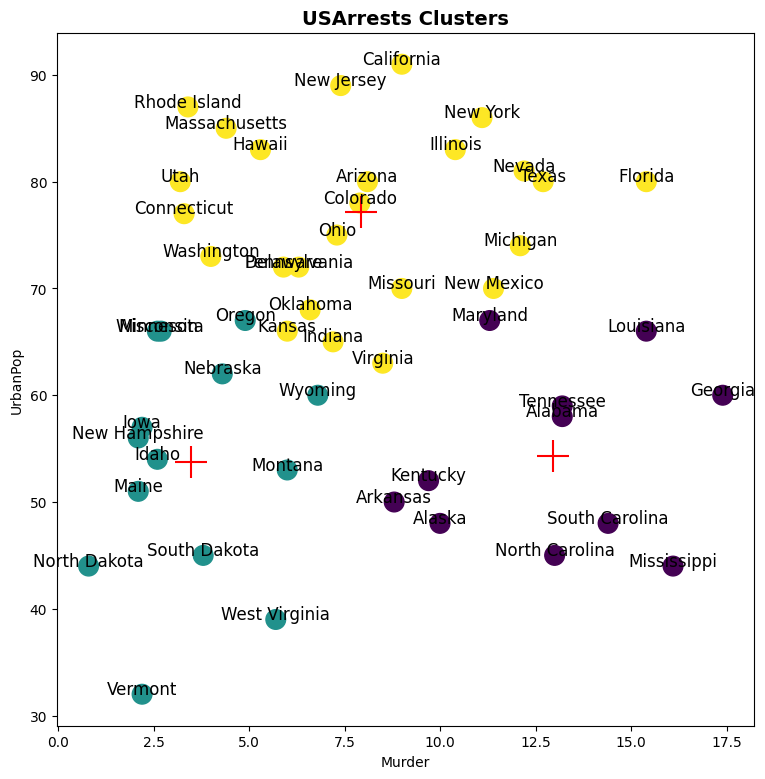

In [14]:
f = plt.figure(figsize=(9,9))

real_centroids = scaler.inverse_transform(centroids)

plt.scatter(x = 'Murder' ,y = 'UrbanPop' , data = df , c = labels , s = 200 )
plt.scatter(x = real_centroids[: , 0] , y =  real_centroids[: , 1] , s = 500 , c = 'red' ,  marker='+')

for line in range(0,df.shape[0]):
  plt.text(df.Murder[line], df.UrbanPop[line], df.index[line],
           horizontalalignment='center',
           size='large',
           color='black')

plt.title('USArrests Clusters', fontsize=14, weight='bold')
plt.ylabel('UrbanPop') , plt.xlabel('Murder')
plt.show()

## Qual o número ideal de Clusters?

### Método do Cotovelo

Antes de prosseguirmos você deve ter notado que até aqui escolhemos arbitrariamente o número de clusters. Como determinar o número ideal de Clusters?  

Um primeiro método é conhecido como método do cotovelo (*elbow method*).
A inércia mede o quanto um conjunto de dados foi agrupado pelo KMédias, ela é a própria variação total dos clusters que vimos acima $Within(C_k)$. Mas um bom modelo deve ter uma baixa inércia, mas também um baixo número de clusters $k$. Desse modo precisamos buscar uma compensação porque a medida de o número de clusters aumenta, a inércia diminui. A ideia, então, é buscar o ponto onde a diminuição da inércia começa a diminuir, o *cotovelo* da curva.


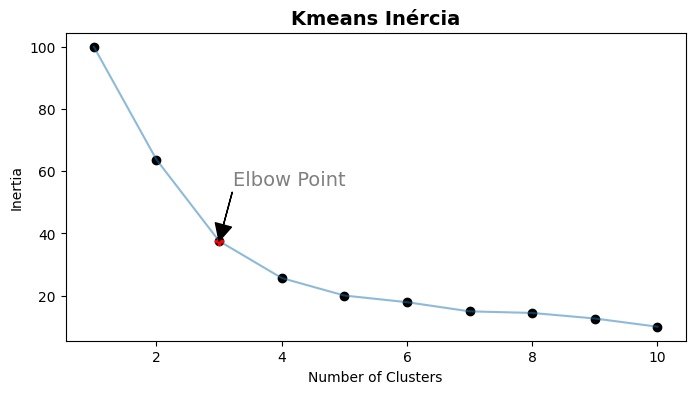

In [15]:
def inercia(X=X, kmin=1, kmax=10):
  inertia = []
  for n in range(kmin , kmax+1):
      clf = KMeans(n_clusters = n , random_state= 1984)
      clf.fit(X)
      inertia.append(clf.inertia_)

  plt.figure(figsize = (8, 4))
  plt.plot(np.arange(1 , 11) , inertia , 'ko')
  plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
  plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
  plt.title('Kmeans Inércia', fontsize=14, weight='bold')
  return inertia

inertia = inercia(X,1,10)
# adicionado depois... ;-)
plt.plot(3 , inertia[2] , 'P', alpha = 1, color = 'red')
plt.annotate('Elbow Point', (3 , inertia[2]),
            xytext=(10, 40), fontsize=14,
            textcoords='offset points',
            color='grey',arrowprops=dict(facecolor='black',width=0.1))

plt.show()

### Método da Silhueta

Outro método que pode ser empregado é o método de cálculo da silhueta. A silhueta é uma medida estatística de quanto um elemento é semelhante ao seu próprio cluster (coesão) em comparação com outros clusters (separação). A silhueta é um valor que varia de $-1$ a $+1$, onde um valor alto indica que o elemento está bem combinado com seu próprio aglomerado e mal combinado com os aglomerados vizinhos. Se a maioria dos elementos tiver um valor alto, a configuração de cluster é apropriada. Se muitos pontos tiverem um valor baixo ou negativo, a configuração de cluster pode ter muitos ou poucos clusters.

O método consiste, portanto, em empregarmos o número de cluster que fornece a maior silhueta média  de todos os grupos.

In [16]:
from sklearn import metrics

for n_clusters in range(2,11):
  clf = KMeans(n_clusters = n_clusters , random_state= 1984)
  clf.fit(X)
  labels = clf.labels_
  print('Silhueta média para', n_clusters , 'clusters: ', np.round( metrics.silhouette_score(X, labels, metric='euclidean'),3))

Silhueta média para 2 clusters:  0.339
Silhueta média para 3 clusters:  0.372
Silhueta média para 4 clusters:  0.385
Silhueta média para 5 clusters:  0.376
Silhueta média para 6 clusters:  0.366
Silhueta média para 7 clusters:  0.353
Silhueta média para 8 clusters:  0.322
Silhueta média para 9 clusters:  0.3
Silhueta média para 10 clusters:  0.349


### Exemplo

Em ambos os metodos é indicado usar o k = 2

In [17]:
df= pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/USArrests.csv',index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
X = scaler.transform(df)

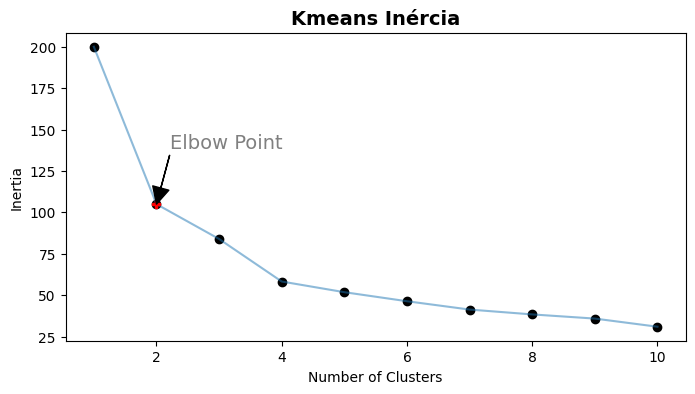

In [19]:
inertia = inercia(X,1,10)
plt.plot(2 , inertia[1] , 'P', alpha = 1, color = 'red')
plt.annotate('Elbow Point', (2 , inertia[1]),
            xytext=(10, 40), fontsize=14,
            textcoords='offset points',
            color='grey',arrowprops=dict(facecolor='black',width=0.1))

plt.show()

In [20]:
for n_clusters in range(2,11):
  clf = KMeans(n_clusters = n_clusters , random_state= 1984)
  clf.fit(X)
  labels = clf.labels_
  print('Silhueta média para', n_clusters , 'clusters: ', np.round( metrics.silhouette_score(X, labels, metric='euclidean'),3))

Silhueta média para 2 clusters:  0.408
Silhueta média para 3 clusters:  0.365
Silhueta média para 4 clusters:  0.338
Silhueta média para 5 clusters:  0.342
Silhueta média para 6 clusters:  0.259
Silhueta média para 7 clusters:  0.243
Silhueta média para 8 clusters:  0.207
Silhueta média para 9 clusters:  0.208
Silhueta média para 10 clusters:  0.227


#### resolvendo com k=2

In [21]:
from sklearn.preprocessing import StandardScaler

# Configura e instancia o estimador
clf = KMeans(n_clusters = 2 , random_state= 1984)  # seed, para a reprodutibilidade dos resultados

# Ajusta o estimador aos dados
clf.fit(X) # somente os atributos Murder e UrbanPop

# Obtém os resultados do modelo
labels = clf.labels_
centroids = clf.cluster_centers_

print(labels)
print(centroids)

[0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1
 1 1 0 1 0 0 1 1 1 1 1 1 1]
[[ 1.01513667  1.02412028  0.19959126  0.85556386]
 [-0.67675778 -0.68274685 -0.13306084 -0.57037591]]


In [22]:
df['Cluster'] = labels
print(df.head())

            Murder  Assault  UrbanPop  Rape  Cluster
rownames                                            
Alabama       13.2      236        58  21.2        0
Alaska        10.0      263        48  44.5        0
Arizona        8.1      294        80  31.0        0
Arkansas       8.8      190        50  19.5        1
California     9.0      276        91  40.6        0


## Cuidado - tamanho do cluster

Verifique ainda se os grupos formados não levam a um grupo excessivamente grande (90% dos dados por exemplo) ou pequeno (1% dos dados por exemplos).

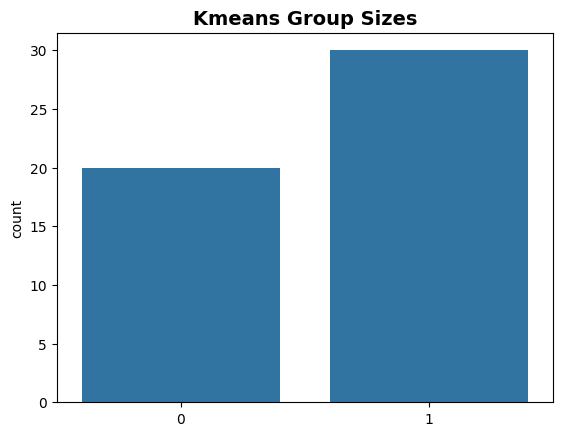

In [23]:
sns.countplot(x=labels)
plt.title('Kmeans Group Sizes', fontsize=14, weight='bold')
plt.show()

## ANALISE DO PERFIL DOS GRUPOS

In [24]:
df.groupby('Cluster').mean()

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,12.165,255.250000,68.400000,29.165000
1,4.870,114.433333,63.633333,15.943333


In [25]:
scaler.inverse_transform(centroids)

array([[ 12.165     , 255.25      ,  68.4       ,  29.165     ],
       [  4.87      , 114.43333333,  63.63333333,  15.94333333]])

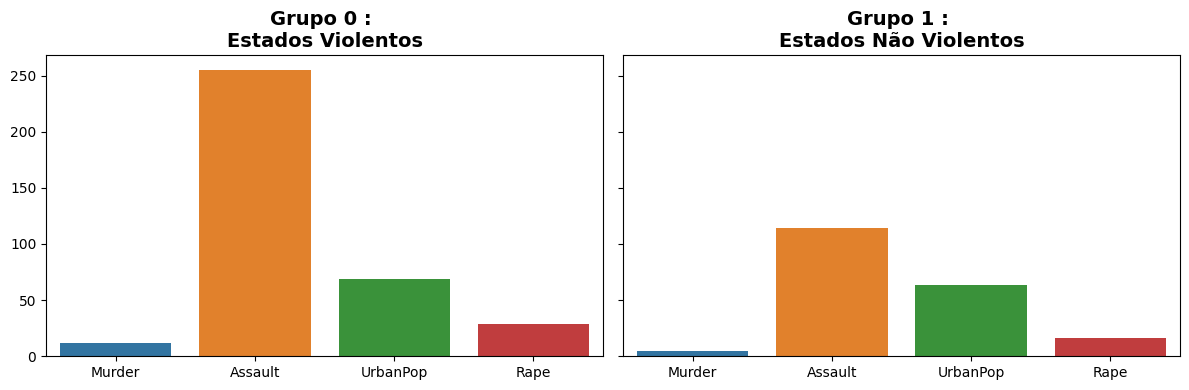

In [26]:
g = pd.DataFrame( df.groupby('Cluster').mean() ).reset_index()

fig, ax = plt.subplots(1,2,figsize=(12,4),sharey=True)

nomes = ['Estados Violentos','Estados Não Violentos']

for i in range(len(g)):
  sns.barplot(data=g[g.Cluster==i].drop(columns='Cluster'),ax=ax[i])
  ax[i].set_title('Grupo ' + str(i) + ' : \n' + nomes[i], fontsize=14, weight='bold')

plt.tight_layout()
plt.show()



/tmp/ipykernel_228095/190801523.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df.Assault[line], df.UrbanPop[line], df.index[line],


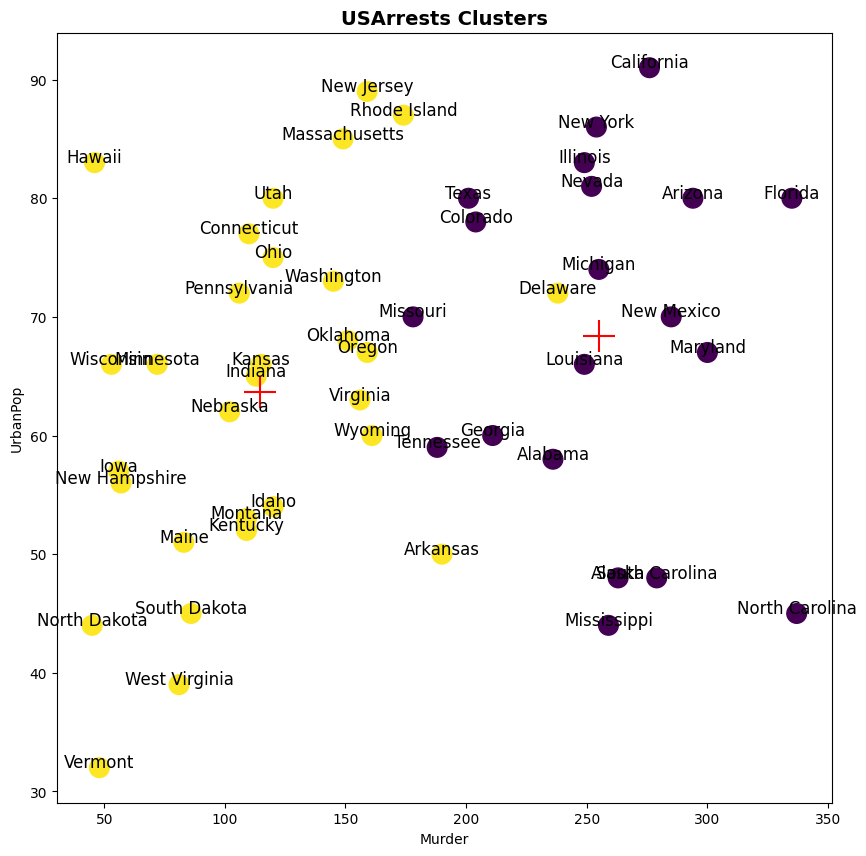

In [27]:
f = plt.figure(figsize=(10,10))

real_centroids = scaler.inverse_transform(centroids)

plt.scatter( x = 'Assault' ,y = 'UrbanPop' , data = df , c = df.Cluster , s = 200 )
plt.scatter(x = real_centroids[: , 1] , y =  real_centroids[: , 2] , s = 500 , c = 'red' ,  marker='+')

for line in range(0,df.shape[0]):
     plt.text(df.Assault[line], df.UrbanPop[line], df.index[line],
              horizontalalignment='center',
              size='large',
              color='black')

plt.title('USArrests Clusters', fontsize=14, weight='bold')
plt.ylabel('UrbanPop') , plt.xlabel('Murder')
plt.show()

# Clustering Hierárquico



A ideia da clusterização hierárquica é a mesma do Kmédias. Mas o seu algoritmo parte de princípios bastante diferentes produzindo assim agrupamentos de dados que podem divergir bastante dependendo dos dados.  

A clusterização hierárquica busca construir uma hierarquia de clusters e existem normalmente duas estratégias:

* No *Cluster Aglomerativo* os agrupamentos são feitos de "de baixo para cima", cada amostra começa em seu próprio agrupamento, e pares de agrupamentos são organizados a medida que sobe a hierarquia.

* No *Cluster Divisivo*, a construção é "de cima para baixo", com todas as amostras começam em um cluster, e as divisões são realizadas recursivamente à medida que se desce na hierarquia dos dados.

O resultado do agrupamento hierárquico fornece uma estrutura que organiza os itens de dados em um *dendrograma*.



## Dendograma

A base para a construção do dendograma é uma matriz de distância entre todas as amostras dos dados e a  figura abaixo ilustra o procedimento de construção do Cluster Aglomerativo. Esse foi aqui adaptado de STAT 555 **Statistical Analysis of Genomics Data**. Os itens de dados aparecem no eixo $x$ e as distâncias das amostras no eixo $y$. Na construção Aglomerativa partimos dos elementos individuais (distância $0$) e vamos *lingando* os dados a partir das menores distâncias para as maiores. Assim, o par de amostras $(3,5)$ é o primeiro a ser *ligado*, pois tem a menor distância entre todos os elementos, o $1$ é ligado em seguida e assim por diante até o dendograma ligar todas as amostras dos dados. A construção pode empregar a distância euclidiana mas também qualquer ou métrica de distância.



## Definição  dos Clusters

Construído o Dendograma a definição dos Clusters pode ser feita estabelecendo-se um *ponto de corte* no dendograma, o que define a distância máxima que os elementos terão dentro de um agrupamento.



<img src="http://meusite.mackenzie.br/rogerio/hclust2.png" width=400, align="center">

<small>
<b>
Figura 2. Diferente Clusters são definidos a partir de um ponto de corte da Árvore do Dendograma. <br></b>(Fonte:
___. STAT 555 Statistical Analysis of Genomics Data. Lesson 10: Clustering - 10.2).

### Exemplo

#### CASO: Wholesale Customer Data

O dataset abaixo traz informações de um distribuidor e seus clientes e inclui os gastos anuais para diferentes produtos.

Fonte: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

Queremos aqui, segmentar os fornecedores pelos produtos que oferecem.




In [ ]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv')
df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

#### Preparação dos Dados

Como queremos segmentar os fornecedores somente por seus produtos vamos excluir os dados de 'Channel','Region' de nossa análise e como, outros estimadores que empregam distância, vamos normalizar os dados.

In [ ]:
df = df.drop(columns=['Channel','Region'])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
X = scaler.transform(df)

X[0:10]

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       [ 0.10011141, -0.62401993, -0.3929769 ,  0.6871443 , -0.49858822,
         0.09341105],
       [ 0.84023948, -0.05239645, -0.07935618,  0.17385884, -0.23191782,
         1.29934689],
       [-0.20480553,  0.33406659, -0.29763704, -0.49615501, -0.22813824,
        -0.02622403],
       [ 0.00995035, -0.35231565, -0.10284877, -0.53451222,  0.05428041,
        -0.34785425],
       [-0.34998145, -0.11398095,  0.15535895, -0.28931479,  0.09228619,
         0.36960125],
       [-0.47790091, -0.2914094 , -0.18533618, -0.54585441, -0.2447264 ,
        -0.2750792 ],
       [-0.47449712,  0.7184949 ,  1.1514234 , -0.39448778,  0.95403053,
         0.20346113]])

#### Definindo o Número de Clusters

Vamos empregar aqui apenas a técnica de média de silhueta.

In [ ]:
for n_clusters in range(2,11):
  clf = KMeans(n_clusters = n_clusters , random_state= 1984)
  clf.fit(X)
  labels = clf.labels_
  print('Silhueta média para', n_clusters , 'clusters: ', np.round( metrics.silhouette_score(X, labels, metric='euclidean'),3))

Silhueta média para 2 clusters:  0.586
Silhueta média para 3 clusters:  0.334
Silhueta média para 4 clusters:  0.353
Silhueta média para 5 clusters:  0.369
Silhueta média para 6 clusters:  0.376
Silhueta média para 7 clusters:  0.294
Silhueta média para 8 clusters:  0.315
Silhueta média para 9 clusters:  0.326
Silhueta média para 10 clusters:  0.312


#### Aglomerative Clustering

Aqui vamos aplicar o estimador de clusterização hierárquica construindo a hierarquia de forma aglomerativa.



In [ ]:
from sklearn.cluster import AgglomerativeClustering

clf = AgglomerativeClustering(n_clusters=2)
# clf = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
# clf = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

clf.fit(X)

# Resultados
labels = clf.labels_
print(labels)



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Você pode verificar, os esquemas de ligação `single` e `complete` não levam a bons resultados e empregamos o esquema de ligação padrão do `scikit-learn`.

In [ ]:
df['Cluster'] = labels
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,0


#### Dendograma

Uma das vantagens da clusterização hierárquica e podermos observar diretamente a estrutura dos dados.

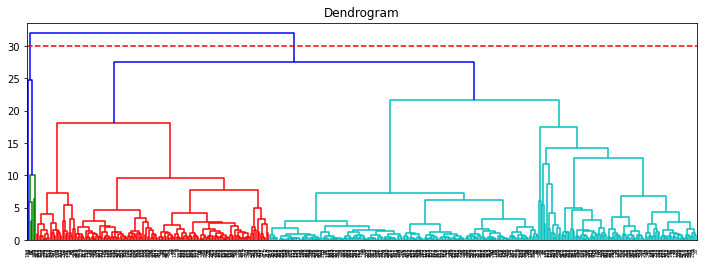

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

f, ax = plt.subplots(1,1,figsize=(12,4),sharey=True)

ax.set_title("Dendrogram")
plt.xticks(rotation=90)

dendrogram = shc.dendrogram(shc.linkage(X, method='ward'))
ax.axhline(y=30, color='r', linestyle='--')

plt.show()

Observando o dendograma você pode notar que 2 clusters não parece uma divisão interessante dos dados e o diagrama ainda sugere que 3 clusters teriam mais sentido para nossos dados.

Vamos então refazer a clusterização para 3 clusters.

In [ ]:
clf = AgglomerativeClustering(n_clusters=3)

clf.fit(X)

# Resultados
labels = clf.labels_
print(labels)

[2 2 2 1 1 2 2 2 1 2 2 1 1 1 1 1 2 2 1 2 1 1 1 1 2 2 1 1 2 1 1 1 1 1 1 2 1
 2 2 1 1 1 2 2 2 2 2 0 2 2 1 1 1 2 1 1 2 2 1 2 2 0 2 2 1 2 2 1 1 1 1 1 1 1
 2 1 1 2 1 1 1 2 2 1 2 0 0 1 1 1 1 1 2 1 2 1 2 1 1 1 2 2 2 1 1 1 2 2 2 2 1
 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 2 1 1
 1 1 1 1 1 2 1 2 2 1 2 2 2 1 1 2 2 2 2 1 1 1 2 2 2 2 1 2 1 1 2 1 1 1 2 0 1
 2 1 2 2 2 1 1 1 2 1 1 1 2 1 1 2 2 2 1 1 2 1 2 2 2 1 2 1 2 2 2 2 1 2 1 1 2
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 1 1 2 1 1 2 1 2 1 1
 1 1 1 1 1 2 2 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 2 2 1 1 2 2 2 2 2 2 1 1 2 1 1 2 1 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 2 1
 0 1 1 1 1 1 1 2 2 2 2 1 2 2 1 1 2 1 2 1 2 1 1 1 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 2 1 1 1 2 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 2 2 2 1 2 2 1 1 2 2 2 2 1 2 1 1 2 2 1 2 1 1 1 2 1 1 1 2 1 1 2 1 1]


In [ ]:
df['Cluster'] = labels
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,1


#### Análise: Tamanho dos Clusters

O grupo pequeno pode ser entendido como dados discrepantes no conjunto das amostras.

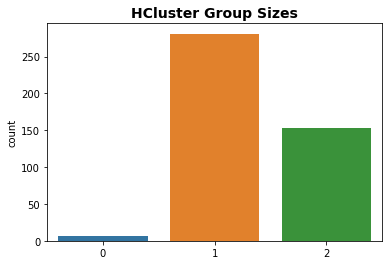

In [ ]:
sns.countplot(x=labels)
plt.title('HCluster Group Sizes', fontsize=14, weight='bold')
plt.show()

#### Análise: Perfil dos Grupos

Observando o perfil dos diferentes fornecedores que nomes você atribuiria a eles?



In [ ]:
df.groupby('Cluster').mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,
0,27477.000000,43542.166667,54588.500000,8285.666667,25018.333333,10247.833333
1,15048.932384,3017.298932,3791.761566,3837.316726,758.007117,1309.900356
2,5794.241830,9419.888889,13761.738562,1461.764706,5913.379085,1577.607843


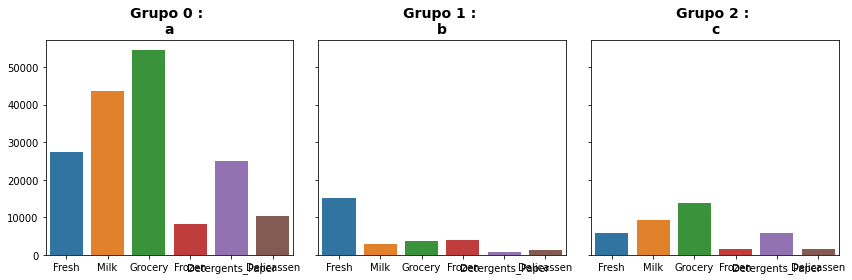

In [ ]:
g = pd.DataFrame( df.groupby('Cluster').mean() ).reset_index()

fig, ax = plt.subplots(1,3,figsize=(12,4),sharey=True)

nomes = ['a','b','c']

for i in range(len(g)):
  sns.barplot(data=g[g.Cluster==i].drop(columns='Cluster'),ax=ax[i])
  ax[i].set_title('Grupo ' + str(i) + ' : \n' + nomes[i], fontsize=14, weight='bold')

plt.tight_layout()
plt.show()



Talvez pudéssemos falar em grupo de *Grandes Fornecedores*, *Pequenos Fornecedores de Produtos Frescos* e *Pequenos Fornecedores de Produtos de Mercearia* e assim, definir estratégias de negócio diferentes para cada segmento!

# Apêndice: O gráfico de silhuetas

Os gráficos apresentam para cada elemento o seu índice de silhueta indicando a maior adequação ou não de cada elemento a cluster. A métrica de silhueta é a média desses valores.

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.5909041986285453
For n_clusters = 3 The average silhouette_score is : 0.5482872649700601
For n_clusters = 4 The average silhouette_score is : 0.34573629344658097
For n_clusters = 5 The average silhouette_score is : 0.3690403826812808
For n_clusters = 6 The average silhouette_score is : 0.37432403986284685


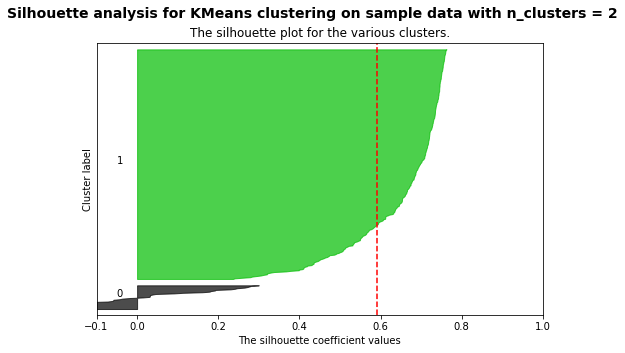

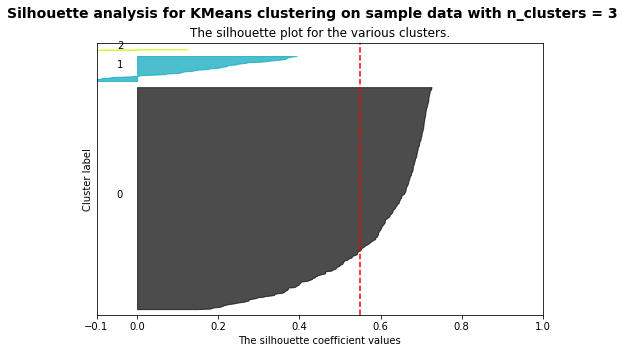

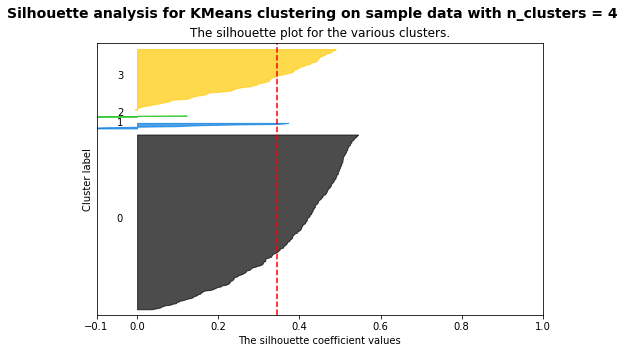

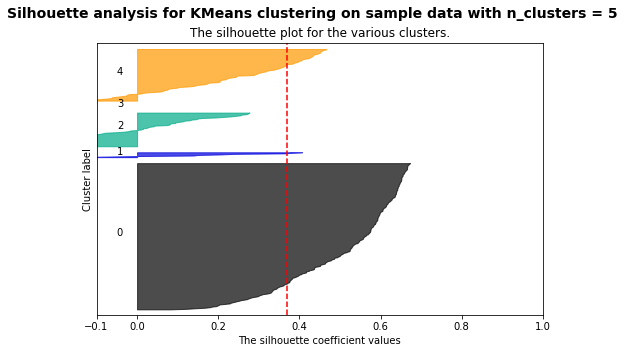

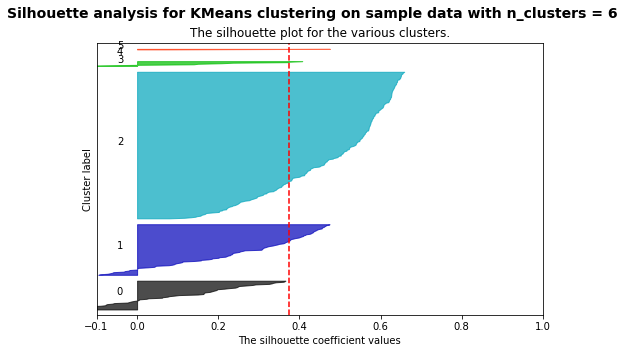

In [ ]:
# you can skip this code!

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X = X

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1,1)
    fig.set_size_inches(8, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])



    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# Introdução Series Temporais

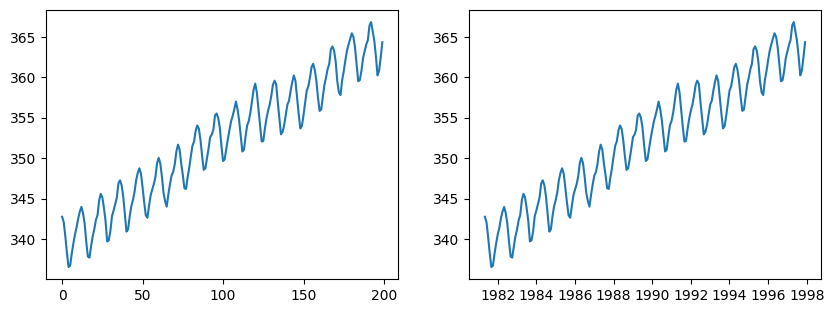

In [ ]:
plt.figure(figsize=(10,3.5))

plt.subplot(1,2,1)
plt.plot(df.CO2)

plt.subplot(1,2,2)
plt.plot(pd.to_datetime(df.Date),df.CO2)

plt.show()



Jeito correto

In [ ]:
df.index = pd.to_datetime(df.Date)
df.drop(columns='Date',inplace=True)
df.head()


,CO2
Date,
1981-05-01,342.74
1981-06-01,342.08
1981-07-01,340.32
1981-08-01,338.26
1981-09-01,336.52


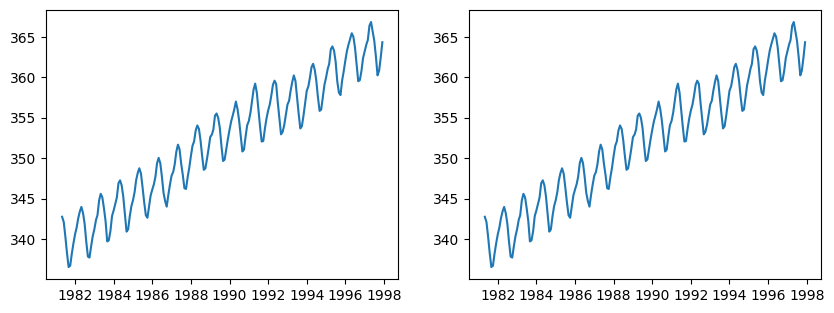

In [ ]:
plt.figure(figsize=(10,3.5))

plt.subplot(1,2,1)
plt.plot(df.CO2)

plt.subplot(1,2,2)
plt.plot(df.index,df.CO2)

plt.show()

# Series Temporais

De acordo com o seu objetivo você pode estar interessado em diferentes tarefas  aplicadas a uma série temporal:

1. Fazer previsões de valores futuros
1. Entender o mecanismo gerador da série
1. Descrever e comparar o comportamento da série
1. Procurar periodicidades e padrões relevantes
1. Identificar anomalias
1. Simular a série de dados

e, certamente, fazer previsões de valores futuros desempenha um papel bastante importante. Em todos os casos busca-se criar um modelo que se pretende útil para análise e aqui nos concentraremos unicamente em modelos auto-regressivos integrados de médias móveis (ARIMA) e de aprendizado de máquina supervisionado para previsões de valores futuros. Ambos são *modelos paramétricos* (possuem um número finito de parâmetros) e modelam as séries no *domínio do tempo* (diferentemente de modelos que empregam a frequência ou o espaço de estados), e estão entre os modelos mais amplamente aplicados na economia, finanças, engenharias e outras áreas.



##### Ignorar

In [ ]:
#@markdown `imports`
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# import matplotlib.ticker as ticker
import warnings

from datetime import datetime as dt

path = 'https://github.com/Introducao-Series-Temporais-em-Python/Book/raw/main/Data/'

course_path = 'https://github.com/Rogerio-mack/SBSI_2024_ts_short_course/raw/main'

# plt.style.use([ 'grayscale' , 'https://github.com/Introducao-Series-Temporais-em-Python/Book/raw/main/tsp.mplstyle' ])
plt.style.use([ 'https://github.com/Introducao-Series-Temporais-em-Python/Book/raw/main/tsp.mplstyle' ])

plt.rcParams['axes.titlesize'] = 12.0
plt.rcParams['figure.titlesize'] = 12.0


In [ ]:
#@markdown `tspplot()`
def tspplot(ts=None,label=None,title=None,ax=None,linestyle='solid',alpha=1,lw=1,nr_xticks=None,nr_yticks=None):

  import matplotlib.ticker as ticker

  if ax is None:
    fig, ax = plt.subplots()

  if label is not None:
    ax.plot(ts, label=label, linestyle=linestyle, lw=lw)
  else:
    ax.plot(ts, linestyle=linestyle,lw=lw,alpha=alpha)

  if title is not None:
    ax.set_title(title)

  if nr_xticks is not None:
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nr_xticks))

  if nr_yticks is not None:
    ax.yaxis.set_major_locator(ticker.MaxNLocator(nr_yticks))

  if label is not None:
    plt.legend()

  plt.tight_layout()

  return



In [ ]:
#@markdown `tspdisplay()`
class tspdisplay(object):
    # Adaptado de https://jakevdp.github.io/PythonDataScienceHandbook/index.html
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <hr>
    <h3 style='font-family:"Courier New", Courier, monospace'>{0}</h3><hr>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args

    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a + '.head()')._repr_html_())
                         for a in self.args)

    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a + '.head()'))
                           for a in self.args)

In [ ]:
#@markdown `tspsimulate()`
import ipywidgets as widgets
from statsmodels.tsa.seasonal import seasonal_decompose

def tspsimulate(nr_months=60, beta_0=1, beta_1=2, beta_2=0, beta_3=0, alpha=0.2, seasons_month_len=10, noise=0.2, model='additive', show_plot=False, title='TS Sample'):
  np.seed = 123
  index_dates = pd.date_range(start='1/1/2000', periods=nr_months, freq='M')

  t = np.arange(0,len(index_dates),1)
  n = len(t)

  T = beta_0 + beta_1*t + + beta_2*t**2 + beta_3*t**3
  S = np.sin( np.arange(0,len(index_dates),1) * 2 * np.pi/seasons_month_len)
  S = S # only positives values
  S = S * T.mean() * alpha # scale
  R = np.random.sample(n)
  R = R # only positives values
  R = R * T.mean() * noise # scale

  if model == 'additive':
    Y = T + S + R
  else:
    Y = T * S * R

  Y = Y + np.abs(Y.min()) + 1 # just to create only positive values

  df = pd.DataFrame()
  df.index = index_dates
  df['t'], df['Y'], df['T'], df['S'], df['R'] = t, Y, T, S, R

  global ts1
  ts1 = df

  decomp = seasonal_decompose(df.Y, model=model, period=seasons_month_len)

  if show_plot:
    fig = decomp.plot()
    fig.set_size_inches((9, 7))

    if title is not None:
      plt.suptitle(title,y=1.05)

    plt.tight_layout()
    plt.show()

  # plt.plot(df['T'])
  # plt.show()

  # plt.plot(df['S'])
  # plt.show()

  return ts1

tspsimulate_ts = widgets.interactive(tspsimulate,  alpha=(0.2,10), beta_0=(-10,10), beta_1=(-10,10), beta_2=(-10,10), beta_3=(-10,10) ,nr_months=(40,120,1), seasons_month_len=(3, 12, 3), noise=(0, 1, 0.01), model=['additive','multiplicative'], show_plot=True)



In [ ]:
# tspsimulate_ts

In [ ]:
#@markdown `tspdecompose()`
def tspdecompose(df,model='additive',title=None):
  from statsmodels.tsa.seasonal import seasonal_decompose

  decomp = seasonal_decompose(df, model='multiplicative')

  fig = decomp.plot()
  fig.set_size_inches((9, 7))

  if title is not None:
    plt.suptitle(title,y=1.05)

  plt.tight_layout()
  plt.show()

  return

### Visualizando uma serie temporal

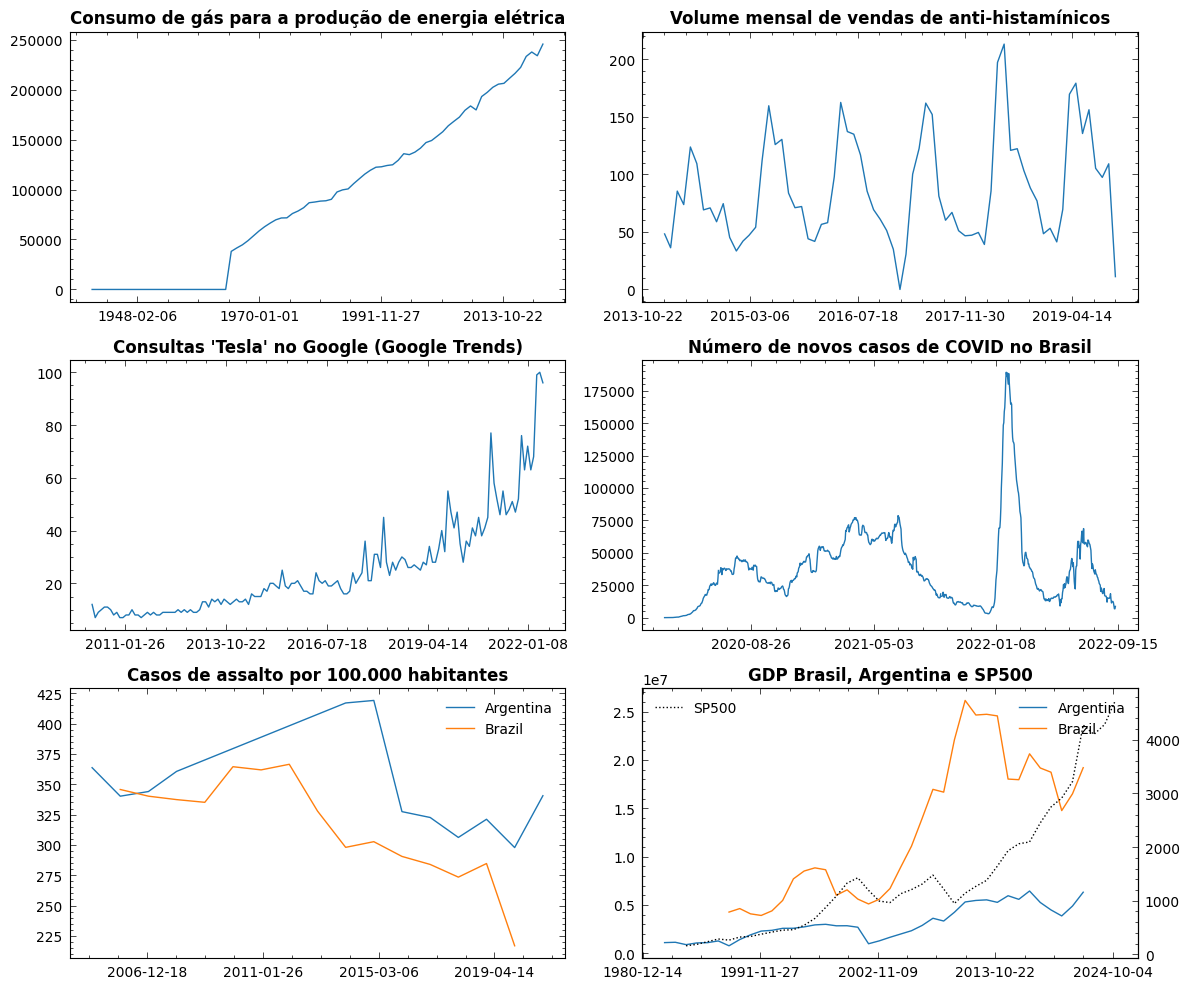

In [ ]:
#@markdown
datasets = pd.read_csv(path + 'datasets.csv', index_col=0)

fig, ax = plt.subplots(3,2,figsize=(12,10))

show_files = ['gas_consumption.csv', 'pharma_sales.csv', 'google_trends_tesla.csv', 'covid_brasil.csv' ]

title_files = ['Consumo de gás para a produção de energia elétrica',
               'Volume mensal de vendas de anti-histamínicos',
               "Consultas 'Tesla' no Google (Google Trends)",
               'Número de novos casos de COVID no Brasil' ]

for i, axis in enumerate(fig.axes):
  if i < 4:
    df = pd.read_csv(path + show_files[i],index_col=0,parse_dates=True)
    tspplot(df[ df.columns[0] ],title=title_files[i],ax=axis,nr_xticks=5)
  else:
    ax = fig.axes[4::]

import matplotlib.ticker as ticker

# fig, ax = plt.subplots(1,2,figsize=(12,3.5))

global_violence = pd.read_csv(course_path + '/data/global_violence.csv',index_col=0,parse_dates=True)
data = global_violence[ global_violence['Category'] == 'Serious assault'][['Country', 'VALUE']]
data = data.sort_index()
for country in data.Country.unique():
  ax[0].plot(data[ data.Country == country ].VALUE, label=country, lw=1)
ax[0].set_title('Casos de assalto por 100.000 habitantes')
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(5))
ax[0].legend()

GDP_BR_AR = pd.read_csv(course_path + '/data/GDP_BR_AR.csv',index_col=0,parse_dates=True)
sp500 = pd.read_csv(course_path + '/data/sp500.csv',index_col=0,parse_dates=True)

for country in GDP_BR_AR.country.unique():
  ax[1].plot(GDP_BR_AR[ GDP_BR_AR.country == country ]['GDP (Current USD)']/100000, label=country, lw=1)

ax2 = ax[1].twinx()
ax2.plot(sp500[sp500.index.year > 1983]['Adj Close'].resample('Y').mean(), 'k:', label='SP500', lw=1)

ax[1].set_title('GDP Brasil, Argentina e SP500')
ax[1].xaxis.set_major_locator(ticker.MaxNLocator(5))

ax2.legend()
ax[1].legend()

plt.tight_layout()
plt.show()




**Figura 1. Diversos exemplos de séries temporais em diferentes áreas de domínio.**

## Decomposição de séries temporais



A ideia de construir um modelo é a de criarmos uma simplificação útil dos dados e no caso de séries temporais o modelo de decomposição é o procedimento clássico.

Em geral decompomos uma série temporal em componentes onde cada um busca modelar um tipo de padrão ou comportamento da série:

* **Tendência**
* **Sazonalidade**
* **Resíduos**
* **Sazonalidade**


<br>
<br>
<br>

* A **tendência** apresenta o comportamento da série no longo prazo, o aumento ou diminuição dos valores da série no longo prazo, como o crescimento da temperatura global ano a ano. 


* A componente **sazonalidade** apresenta o padrão sazonal da série, como mudanças que ocorrem com alguma periodicidade ao longo do tempo. É o caso dos acréscimos e decréscimos de temperatura que ocorrem ao longo das estações do ano, independentemente da elevação das temperaturas no longo prazo.


* Por último, os **resíduos**, apresentam o comportamento  estocástica, ou *aleatório* da série, e que não sabemos explicar. Correspondem, por exemplo, às diferenças de temperatura entre dois dias consecutivos da mesma estação causadas por inúmeros fatores como a maior presença de nuvens ou de raios solares naqueles dias. Essa componente também pode ser denominada de *erro aleatório* ou *ruído branco*.

* Vários desses comportamentos podem ser observados nas séries de Figura 1, como a tendência linear crescente do consumo de gás para geração de energia, as sazonalidades anais da venda de anti-histamínicos etc.

* Em geral, a tendência inclui uma outra componente denominada **ciclo**, mas que por simplicidade denominamos unicamente de tendência. Ciclos e mudanças sazonais são comportamentos bem diferentes nas séries temporais. A sazonalidade é um comportamento recorrente que se repete a intervalos fixos, regulares (a maior temperatura em certas estações do ano, o maior número de visitas em um site de entretenimento aos finais de semana). **Já os ciclos são comportamentos recorrentes mas que ocorrem a intervalos não regulares. Vulcões e terremotos, por exemplo, têm um comportamento recorrente, mas não sabemos quando irão ocorrer, e uma série que represente as temperaturas ou o tremor em torno da cratera do Vulcão Eyjafjallajökull apresentará comportamentos repetitivos,** mas que não são sazonais. O mesmo ocorre com os ciclos econômicos que alternam recessão e crescimento, e não sabemos quando irá ocorrer a próxima crise ou o estouro de uma *bolha* do mercado. Nas séries de Figura 1, por exemplo, podemos observar alguns 'ciclos' de séries financeiras (GDP e SP500) e das ondas de variantes da pandemia de COVID.





## **Séries temporais em Python**

### importações

In [ ]:
# basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Analise inicial dos dados

In [ ]:
df = pd.read_csv(course_path + '/data/capea-consulta-cafe.csv')
df.head()

,Data,vista R$,vista US$
0,01/2014,288.98,119.88
1,02/2014,366.32,153.96
2,03/2014,437.24,187.79
3,04/2014,449.45,201.45
4,05/2014,429.28,193.22


In [ ]:
df[ df['vista R$'] > 1400 ][ ['Data', 'vista R$'] ]

,Data,vista R$
95,12/2021,1452.15
96,01/2022,1482.59
97,02/2022,1485.35


In [ ]:
df.dtypes

Data          object
vista R$     float64
vista US$    float64
dtype: object

In [ ]:
# seleção errônea dos dados com o atributo Data no formato de caracteres (object)
df[ df['Data'] > '10/2023' ].head()

,Data,vista R$,vista US$
10,11/2014,460.96,180.61
11,12/2014,455.20,172.39
22,11/2015,469.39,124.29
23,12/2015,479.32,123.94
34,11/2016,556.74,166.83


In [ ]:
# seleção correta dos dados com o atributo Data no formato de datetime
df.Data = pd.to_datetime(df.Data)
df[ df['Data'] > '10/2023' ].head()

,Data,vista R$,vista US$
118,2023-11-01,888.00,181.31
119,2023-12-01,974.46,198.90
120,2024-01-01,1003.74,204.34


In [ ]:
df.Data = pd.to_datetime(df.Data)
df[ df['Data'].dt.year > 2023 ].head()

,Data,vista R$,vista US$
120,2024-01-01,1003.74,204.34


### Colocando o index dos dados em formato de data 

Em `Python`, muitas funções úteis para a manipulação de séries temporais como resample, gráficos e uso de outros pacotes, requerem que o atributo de tempo da série temporal esteja representado no índice dos dados.

In [ ]:
df.index = pd.to_datetime(df.Data)
df = df.drop(columns='Data')
df.head()

,vista R$,vista US$
Data,,
2014-01-01,288.98,119.88
2014-02-01,366.32,153.96
2014-03-01,437.24,187.79
2014-04-01,449.45,201.45
2014-05-01,429.28,193.22


In [ ]:
# resample dos dados por ano
df_year = df.resample('Y').mean()
df_year.head()

,vista R$,vista US$
Data,,
2014-12-31,418.572500,177.984167
2015-12-31,451.494167,137.497500
2016-12-31,494.522500,142.853333
2017-12-31,465.690833,146.050833
2018-12-31,435.646667,120.087500


### Gráficos


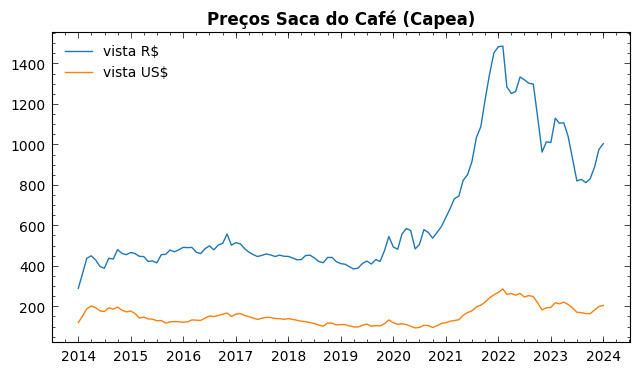

In [ ]:
plt.plot(df,label=['vista R$','vista US$'])

plt.title('Preços Saca do Café (Capea)')
plt.legend()
plt.show()

### Decompondo uma série temporal

O principal pacote para modelos estatísticos de séries de dados em `Python` é o `statsmodel`, e a função `seasonal_decompose()` permite decompor uma série em suas componentes de tendência, sazonalidade e resíduos.

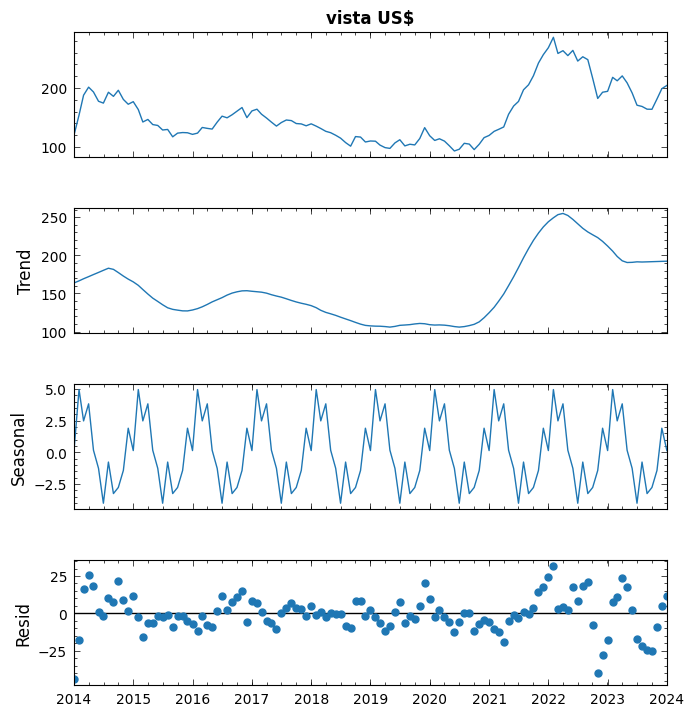

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['vista US$'], model='additive', extrapolate_trend=1)

fig = result.plot()
fig.set_size_inches((7, 8))
plt.show()



In [ ]:
df_compose = pd.DataFrame()

df_compose['trend'] = result.trend
df_compose['seasonal'] = result.seasonal
df_compose['resid'] = result.resid

df_compose['compose'] = df_compose.sum(axis=1)
df_compose.head()

,trend,seasonal,resid,compose
Data,,,,
2014-01-01,163.774583,0.142035,-44.036618,119.88
2014-02-01,166.537917,4.960345,-17.538262,153.96
2014-03-01,169.301250,2.486304,16.002446,187.79
2014-04-01,172.064583,3.833470,25.551946,201.45
2014-05-01,174.827917,0.168887,18.223196,193.22


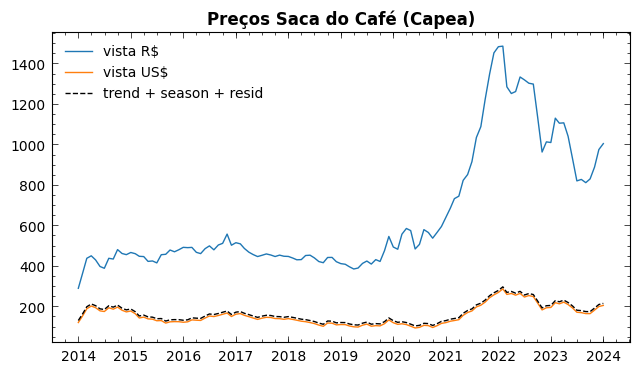

In [ ]:
plt.plot(df,label=['vista R$','vista US$'])
plt.plot(df_compose['compose']+10,color='k',linestyle='dashed',label='trend + season + resid')

plt.title('Preços Saca do Café (Capea)')
plt.legend()
plt.show()

## Séries aditivas e multiplicativas

 A depender da natureza da série as componentes de tendência, sazonalidade e resíduo podem ser combinadas de forma aditiva ou multiplicativa, isto é:

$$ Y_t = T_t + S_t + R_t $$

para modelos aditivos, ou:

$$ Y_t = T_t \times S_t \times R_t $$

para modelos multiplicativos, sendo $Y_t$ a série observada e $T_t, S_t, R_t$ respectivamente as componentes de tendência, sazonalidade e resíduo.

Idealmente você pode ter em mente que séries aditivas apresentam valores que, embora apresentem variações, têm uma variação limitada ao longo do tempo. Já séries multiplicativas, em geral, apresentam um comportamento explosivo, ou exponencial. De qualquer modo, lembre-se que os modelos são simplificações que buscam ser úteis, e uma série, por exemplo a atividade solar a cada mês, não tem qualquer obrigação de se comportar de forma aditiva ou multiplicativa, e nem sempre é muito simples identificar se uma série é aditiva ou multiplicativa.



##### ignora

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

def ADF(df,verbose=False):
  result = adfuller(df)
  if verbose:
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

    if result[1] < 0.05:
      print('Série é ADF estacionária')
    else:
      print('Série é não ADF estacionária')

  return result

In [ ]:
#@markdown `PLOT`
def PLOT(df,ADF_result):

  fig, ax = plt.subplots(1,2,figsize=(12,3.5))
  ax[0].plot(df,label='Série',alpha=0.5,lw=1)
  # plt.setp(ax[0].get_xticklabels(), fontsize=9)
  ax[0].tick_params(axis='x', labelsize=9)
  ax[0].plot(df.rolling(ADF_result[2]).mean(),label='Média Móvel (' + str(ADF_result[2]) + ')',c='k')

  if ADF_result[1] < 0.05:
    ax[0].set_title('Série ADF estacionária, p-value = ' + str(np.round(ADF_result[1],4)))
  else:
    ax[0].set_title('Série não ADF estacionária, p-value = ' + str(np.round(ADF_result[1],4)))

  ax[0].legend(loc='upper left')

  grouped_means = [df['values'][i:i+ADF_result[2]].mean() for i in range(0, len(df), ADF_result[2])]
  grouped_var = [df['values'][i:i+ADF_result[2]].var() for i in range(0, len(df), ADF_result[2])]

  ax[1].plot(range(len(grouped_means)), grouped_means, label='Médias',alpha=0.8)
  ax[1].plot(range(len(grouped_var)), grouped_var, label='Variância',alpha=0.8, linestyle='dashed')

  ax[1].set_title('Médias e variância ao longo do tempo')
  ax[1].legend(loc='upper left')

  plt.tight_layout()
  plt.show()

  return





## 2.4. Estacionariedade  

Decompor uma série já traz informações bastante úteis, como a tendência de seus valores futuros, padrões sazonais e seu grau de incerteza. Mas na maior parte dos casos estamos interessados em fazer previsões mais assertivas dos valores futuros.

Para isso, a maior parte dos modelos assume que a série que se deseja prever é uma série *estacionária*. Uma série  estacionária, é uma série em que as estatísticas dos dados, isto é, média, variância e covariância *não mudam ao longo do tempo*. A *estacionariedade no sentido amplo* significaria a ausência completa de tendência e sazonalidade da série. Mas, em geral, é suficiente e mais comum a *estacionariedade no sentido restrito*, podendo haver mudanças das estatísticas em algum momento (como as sazonalidades) mas não *ao longo do tempo*.



In [ ]:
no_stacionary_avg = pd.read_csv(course_path + '/data/no_stacionary_avg.csv',index_col=0,parse_dates=True)
no_stacionary_var = pd.read_csv(course_path + '/data/no_stacionary_var.csv',index_col=0,parse_dates=True)
stacionary = pd.read_csv(course_path + '/data/stacionary.csv',index_col=0,parse_dates=True)


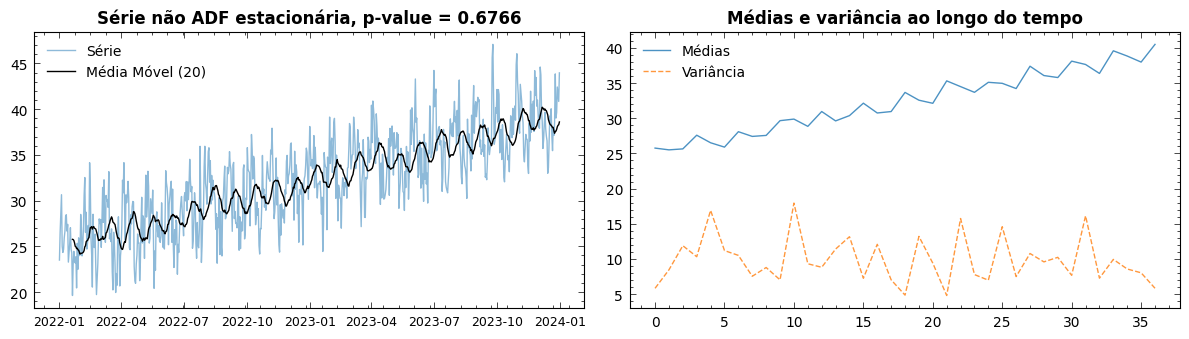

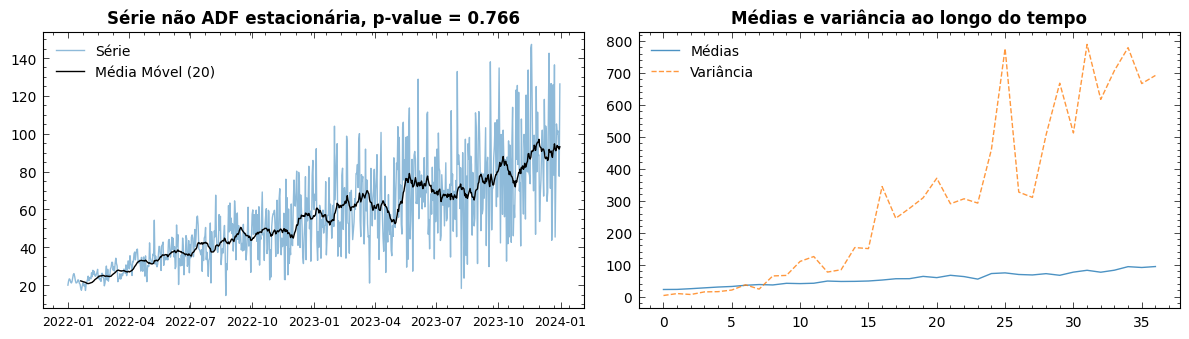

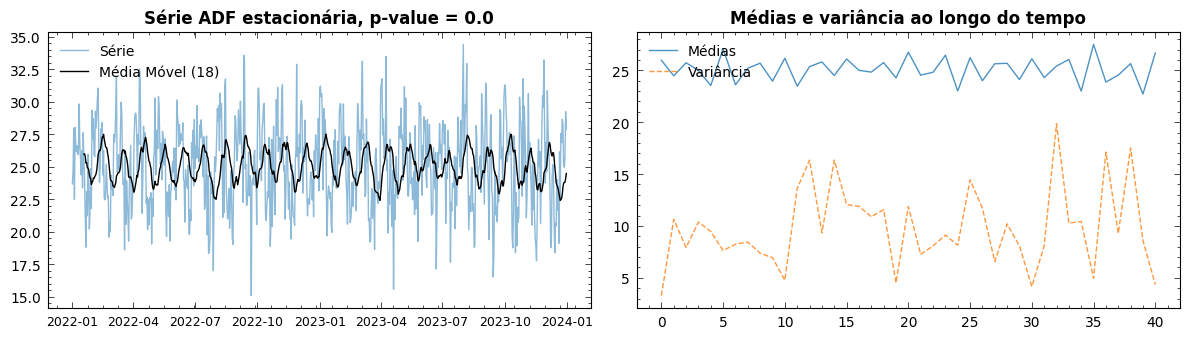

In [ ]:
PLOT(no_stacionary_avg, ADF(no_stacionary_avg))
PLOT(no_stacionary_var, ADF(no_stacionary_var))
PLOT(stacionary, ADF(stacionary))

Há vários testes estatísticos para verificar a estacionariedade de uma série temporal, mas os testes mais comuns são o teste **Augmented Dickey Fuller (“ADF”)** e o teste **Kwiatkowski-Phillips-Schmidt-Shin (“KPSS”)** e que, basicamente, verificam a presença de tendência na série e  entendimento do domínio e a análise exploratória dos dados são essenciais para uma interpretação adequada desses testes. Os gráficos anteriores ilustram diferentes casos de  estacionariedade e não estacionariedade com os respectivos p-values do teste ADF.

Tanto no ADF como no KPSS teste, a hipótese nula (estacionariedade) é rejeitada para $\text{p-value} > 0.05$. Assim, **para $\text{p-value} < 0.05$, diremos que a série é estacionária**.

## 2.5. Sazonalidade

A inspeção visual das séries desempenha um papel fundamental na identificação de sazonalidades, como também da estacionariedade apesar dos testes disponíveis. Gráficos de agrupamentos com os valores médios por dia, mês etc. são bastantes empregados e constituem a base de muitos modelos de sazonalidade.

In [ ]:
# Criando uma série de periodicidade anual
date_range = pd.date_range(start='2021-01-01', periods=4*12, freq='M')
seasonal_pattern = np.sin(np.linspace(0, 2*np.pi, 12)) # Repetindo o padrão mensal (de janeiro a dezembro) por 3 anos
values = np.tile(seasonal_pattern, 4) # Repetindo o padrão sazonal para os 4 anos
values = 10*values + 5*np.random.sample(len(values))

time_series = pd.DataFrame({'Value': values},index=date_range)

In [ ]:
# agregando os valores
group_month = pd.DataFrame(time_series.groupby([time_series.index.year,time_series.index.month]).mean()).reset_index()
group_month.columns = ['year','month','values']


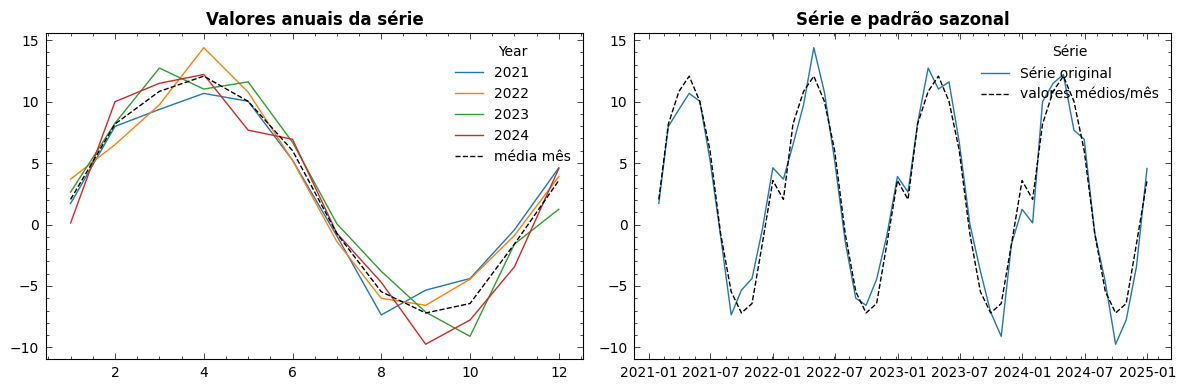

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

for y in group_month.year.unique():
 ax[0].plot(group_month[ group_month.year == y ].month,group_month[ group_month.year == y ]['values'],label=y)

ax[0].plot(time_series.index.month.unique(),time_series.groupby([time_series.index.month]).mean(),'k--',label='média mês')
ax[0].set_title('Valores anuais da série')
ax[0].legend(title='Year',loc='upper right')

ax[1].plot(time_series,label='Série original')
ax[1].plot(time_series.index,np.tile(time_series.groupby([time_series.index.month]).mean().values.flatten(),4),'k--',label='valores médios/mês')
ax[1].set_title('Série e padrão sazonal')
ax[1].legend(title='Série',loc='upper right')

plt.tight_layout()
plt.show()

### 2.5.1. Peridiograma

Apesar da importância e predominância da inspeção visual, o **peridiograma** pode ser uma ferramenta bastante útil e mais adiante introduziremos os gráficos autocorrelação que também nos ajudam a identificar sazonalidades.

O peridiograma apresenta a distribuição das frequências em um sinal ao longo do tempo e as frequências mais presentes podem ser empregadas para identificar as sazonalidades presentes na série.

$$ P_i = \frac{\text{Total de Períodos}}{freq_i} $$

onde, $P_i$ é a periodicidade da frequência $freq_i$. Pode haver inúmeras frequências, mas podemos nos limitar as mais predominantes (1, 2 ou 3 mais presentes).

,frequencies,spectrum,periods
24,24.0,2.960242,30.416667
104,104.0,1.515986,7.019231
25,25.0,0.723724,29.200000
105,105.0,0.305413,6.952381
23,23.0,0.188924,31.739130


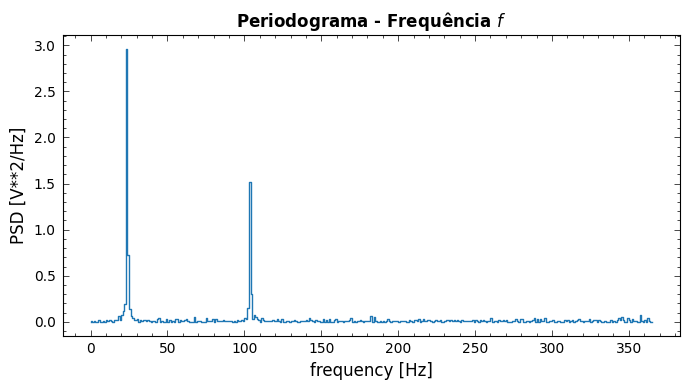

In [ ]:
from scipy import signal
fig, ax = plt.subplots(figsize=(7,4))

frequencies, spectrum = signal.periodogram(stacionary['values'],fs=len(stacionary))

ax.step(frequencies, spectrum)

ax.set_title('Periodograma - Frequência $f$')
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('PSD [V**2/Hz]')

dfft = pd.DataFrame()
dfft['frequencies'], dfft['spectrum'] = frequencies, spectrum
dfft['periods'] = len(stacionary) / dfft['frequencies']
display(dfft.sort_values('spectrum',ascending=False).head())

plt.tight_layout()
plt.show()



## 2.6. Diferenciação e Log: eliminando a tendência e sazonalidade

Um dos métodos mais simples para se reduzir a tendência de uma série temporal é construir uma nova série por **diferenciação**. Nesta nova série o valor no intervalo de tempo atual é calculado como a diferença entre o valor original e o valor no intervalo de tempo anterior.

$$ \Delta^1 y_t = y_t - y_{t-1} $$  
$$ \Delta^d y_t = y_t - y_{t-d} $$  


A diferenciação acima é de ordem 1 e diferenciações maiores podem ser aplicadas para, por exemplo, eliminar uma tendência polinominal. Para tendências exponenciais pode ser necessário aplicar, do mesmo modo, a transformação *logarítimica* da série (tornando-a linear) antes de se aplicar a diferenciação.

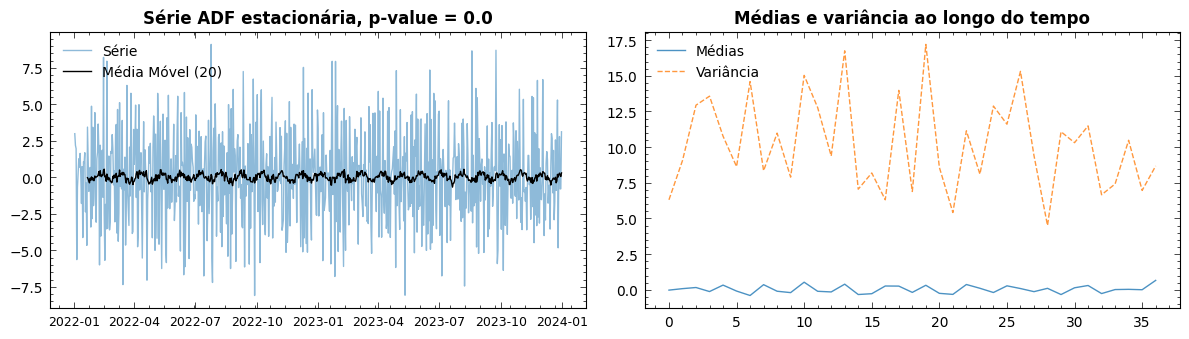

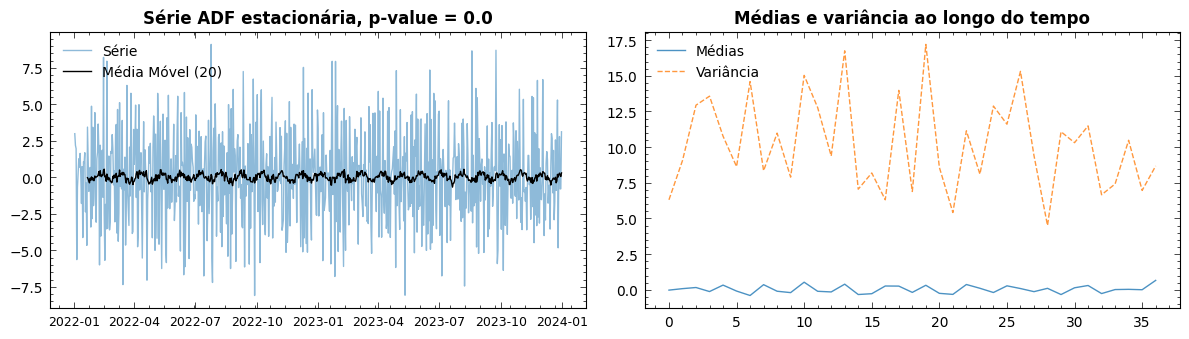

In [ ]:
PLOT(no_stacionary_avg.diff().dropna(), ADF(no_stacionary_avg.diff().dropna()))
PLOT(no_stacionary_avg.diff().dropna(), ADF(no_stacionary_avg.diff().dropna()))

In [ ]:
no_stacionary_varlog = no_stacionary_var.copy() + 100
no_stacionary_varlog['values'] = np.log(no_stacionary_varlog['values'])

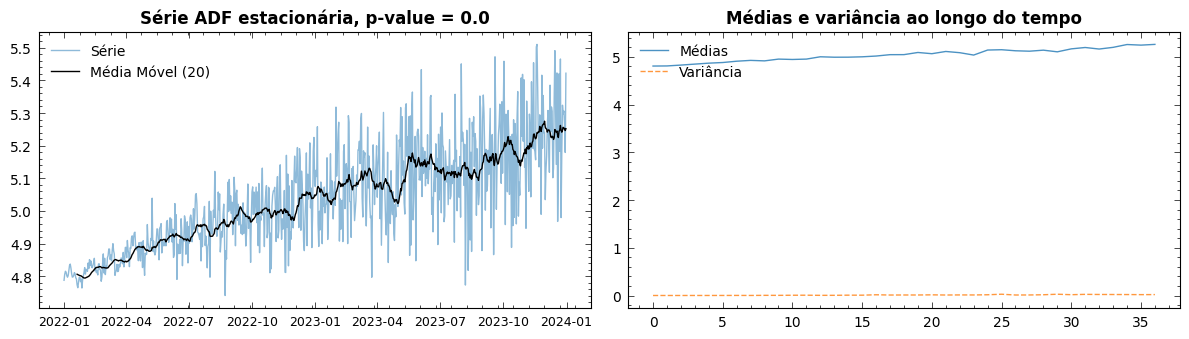

In [ ]:
PLOT(no_stacionary_varlog.dropna(), ADF(no_stacionary_varlog.diff().dropna()))

In [ ]:
#@markdown
# nota: para reconstrução da série original a partir da série diferenciada com cumsum()
no_stacionary_avg['y'] = no_stacionary_avg['values']
no_stacionary_avg['y.diff()'] = no_stacionary_avg['y'].diff()

no_stacionary_avg['y_cumsum()'] = no_stacionary_avg['y'].diff()
no_stacionary_avg.at['2022-01-01','y_cumsum()'] = no_stacionary_avg.iloc[0]['y']
no_stacionary_avg['y_cumsum()'] = no_stacionary_avg['y_cumsum()'].cumsum()

# no_stacionary_avg.head()

## 2.7. Resíduos

Os pressupostos do modelo ARIMA incluem a estacionariedade da série temporal (ou a estacionariedade por diferenciação), mas também a independência dos resíduos e a normalidade dos resíduos.

O termo resíduo é ser empregado para designar a diferença entre os valores reais e o ajuste obtido da série por algum modelo e consiste em uma componente *não explicada* série.

Essa diferença pode ser medida de diversas formas, mas ao final todas refletem as diferenças da série real $Y_t$ e os valores estimados $\hat Y_t$ que queremos minimizar. Por serem muito empregadas algumas dessas medidas recebem nomes especiais:

* Erro Médio Absoluto (*Mean Absolute Error*), $MAE = \frac{1}{n} \sum | Y_t - \hat Y_t |$

* Erro Médio Quadrático (*Mean Square Error*), $MSE = \frac{1}{n} \sum ( Y_t - \hat Y_t )^2$

* Raiz do Erro Médio Quadrático (*Root Mean Square Error*), $RMSE = \sqrt{ \frac{1}{n} \sum ( Y_t - \hat Y_t )^2 } $

* Erro Percentual Absoluto Médio (*Mean Absolute Percentage Error*), $MAPE = \frac{1}{n} \sum | \frac{Y_t - \hat Y_t}{Y_t} |$

Todas medidas que podem ser fácil e diretamente calculadas ou pode-se empregar algum pacote.



In [ ]:
import statsmodels.tools.eval_measures as eval_measures

def error_measures(y, y_pred):

    mae = np.mean(np.abs(y_pred - y))                  # MAE
    mse = np.mean((y_pred - y)**2)                     # MSE
    rmse = eval_measures.rmse(y, y_pred, axis=0)       # RMSE from statsmodels
    # rmse = np.mean((y_pred - y)**2)**.5              # RMSE
    mape = np.mean(np.abs(y_pred - y)/np.abs(y))       # MAPE

    metrics = {'MSE':mse, 'MAE': mae, 'RMSE':rmse, 'MAPE':mape}

    for key, value in metrics.items():
      print(f'{key}: \t {value:.4f}')

    return metrics

In [ ]:
result = seasonal_decompose(stacionary, model='additive')

non_NA = pd.merge(stacionary, result.trend, how='inner', left_index=True, right_index=True).dropna().index # exclui valores nulos das previsões

y = stacionary.loc[non_NA]['values']
y_pred = result.trend.loc[non_NA] + result.seasonal.loc[non_NA]

_ = error_measures(y,y_pred)

MSE: 	 3.6922
MAE: 	 1.5335
RMSE: 	 1.9215
MAPE: 	 0.0628


Mas além de buscar minimizar o erro, ou resíduos, queremos que seus valores sejam independentes, no sentido de não estarem correlacionados, e que apresentem uma distribuição normal.

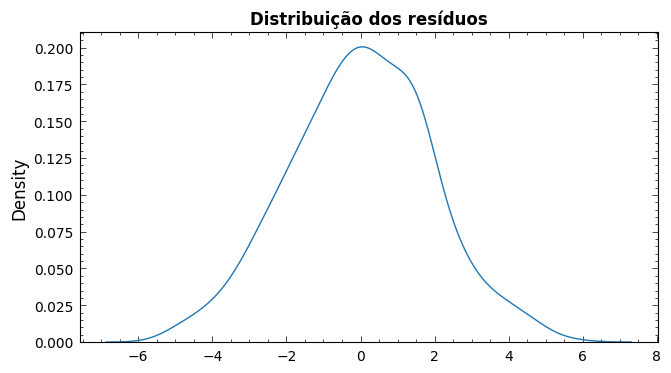

In [ ]:
sns.kdeplot(y - y_pred)

plt.title('Distribuição dos resíduos')
plt.show()

A normalidade dos resíduos pode ser verificada através de um gráfico de distribuição ou do tipo *qqplot*, o que é mais comum que o uso de testes de hipótese de normalidade. Para independência dos resíduos pode-se empregar um gráfico de autocorrelação dos resíduos. Veremos esse gráfico mais adiante como também uma função `plot_diagnostics()` do `statsmodels` que agrega todos esses gráficos para uma melhor análise dos resíduos.

## **Modelos autoregressivos** - na previsão de valores 

 A ideia principal dos modelos autoregressivos, incluindo o ARIMA, consiste em modelar a dependência serial dos dados, uma vez que, na maioria das séries, observa-se que os valores recentes estão correlacionados com seus valores passados e que a força dessa dependência diminui quando considerados valores mais distantes no tempo. Assim, é razoável pensar que o valor de amanhã das vendas de uma safra ou do volume de chuvas está correlacionado com os mesmos valores observados ontem, ou no dia anterior, e que essa correlação diminui conforme nos afastamos no tempo.



## 3.1. Modelos de regressão e autoregressão

Modelos de regressão se baseiam em variáveis independentes para prever a variável dependente, os modelos de autoregressão usam os próprios valores passados da variável dependente para fazer previsões futuras. Para séries temporais, em geral, faz mais sentido empregarmos a forma autoregressiva que empregar o tempo (que seria única variável independente em uma única série de dados). Entretanto, em ambos os casos o cálculo dos coeficientes pode ser feito do mesmo modo (em geral um método de mínimos quadrados).




In [ ]:
co2 = pd.read_csv(path + 'co2.csv',index_col=0,parse_dates=True)

co2['CO2_t-1'] = co2.CO2.shift()
co2['CO2_t-2'] = co2.CO2.shift().shift()
co2 = co2.dropna()
co2.head()


,time,CO2,CO2_t-1,CO2_t-2
Date,,,,
1981-07-01,2,340.32,342.08,342.74
1981-08-01,3,338.26,340.32,342.08
1981-09-01,4,336.52,338.26,340.32
1981-10-01,5,336.68,336.52,338.26
1981-11-01,6,338.19,336.68,336.52


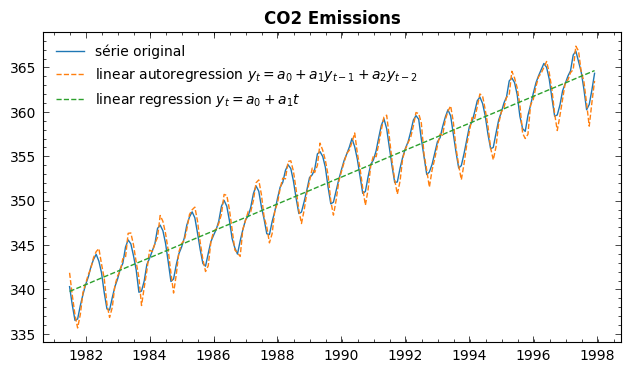

In [ ]:
import statsmodels.api as sm

# regressão
X = co2[['time']]
y = co2[['CO2']]

X = sm.add_constant(X)
y_regression = sm.OLS(y, X).fit().predict()

# auto regressão
X = co2[['CO2_t-1','CO2_t-2']]

X = sm.add_constant(X)
y_autoregression = sm.OLS(y, X).fit().predict()

# show results
plt.plot(co2.CO2,label='série original')
plt.plot(co2.index,y_autoregression, '--', label='linear autoregression $y_t = a_0 + a_1 y_{t-1} + a_2 y_{t-2}$')
plt.plot(co2.index,y_regression, '--', label='linear regression $y_t = a_0 + a_1 t$')

plt.legend(loc='upper left')
plt.title('CO2 Emissions')
plt.show()

## 3.2. Modelo ARIMA

Existem vários tipos de modelos, empregando diferentes princípios, para análise e previsões de séries temporais. O modelo ARIMA (Autorregressivos Integrados de Médias Móveis), é um modelo de análise estatística amplamente utilizado para modelar séries temporais estacionárias e não estacionárias, e constituir a base de modelos mais complexos (ARIMAX, VARIMAX, SARIMAX, ARCH, GARCH etc. envolvendo variáveis exógenas, sazonalidades e volatilidade de séries temporais). O ARIMA é, portanto, um modelo fundamental.

O modelo ARIMA consiste nos seguintes componentes:

* $AR (p)$ : Termo autoregressivo que incorpora a dependência entre uma observação e uma série de observações defasadas até a ordem $p$, o que pode ser escrito do seguinte modo:

$$Y_t=\phi_0 + \phi_1Y_{t-1}+ \phi_2Y_{t-2}+...+ \phi_pY_{t-p} + \epsilon_t,$$

onde $\epsilon_t$ é o erro do modelo.

* $I (d)$: Termo integrado que envolve diferenciar na ordem $d$ os dados da série temporal para torná-los estacionários.

$$W_t={\Delta^d Y_t} = Y_t - Y_{t-d}$$ e portanto,
$$ Y_t =  W_t + Y_{t-d}$$

* $MA (q)$: Termo de média móvel que leva em conta a dependência entre uma observação e um erro residual de um modelo de média móvel de ordem $q$.

$$Y_t=\mu + e_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} +...+ \theta_q \epsilon_{t-q} ,$$

onde $\mu$ é a média da série.

Tanto o modelo $AR$ como o modelo $MA$ são conceitualmente e podem ser calculados como uma regressão linear do valor atual da série, respectivamente sobre seus valores passados ($AR$) e os termos de erro com relação à média móvel ($MA$).
Ao final o modelo ARIMA completo pode ser escrito como:

$$W_t=\underbrace{\Delta^d Y_t}_{I(d)}$$

$${W_t} = \underbrace{\phi_0+ \phi_1 W_{t-1}+ \phi_2 W_{t-2}+...+\phi_p  W_{t-p}}_{AR(p)} +\underbrace{\epsilon_t + \theta_1 \epsilon_{t-1}+ \theta_2 \epsilon_{t-2}+...+ \theta_q \epsilon_{t-q}}_{MA(q)}, $$

$$ Y_t =  W_t + Y_{t-d}$$

Assim, o modelo ARIMA é a junção de modelos que podem também ser empregados de forma independente como segue.

<br>

\begin{array}{c c c}
\hdashline
\text{Model}&\text{ARIMA(p,q,d)}&\text{Tipo de Série}\\ \hdashline
AR(p) & ARIMA(p, 0, 0) & \text{estacionária} \\
MA(q) & ARIMA(0, 0, q) & \text{estacionária} \\
ARMA(p,q) & ARIMA(p, 0, q) & \text{estacionária} \\
ARIMA(p, d, q) & ARIMA(p, d, q) & \text{não estacionária} \\   \hdashline
\end{array}

<br>

E em todos os casos como vimos assume-se a independência e a normalidade dos resíduos da série.



### 3.2.1. Exemplo 1
Considerando a série $Y_t$ estacionária podemos considerar os seguintes modelos de ordem 1:

<br>

\begin{array}{c c }
\hdashline
\text{Modelo}&\text{ARIMA(p,q,d)}\\ \hdashline
AR(1) \space \text{ou} \space ARIMA(1,0,0) & Y_t=\phi_0 + \phi_1Y_{t-1} + \epsilon_t  \\
I(1) \space \text{ou} \space ARIMA(0,1,0) & Y_t= Y_{t-1} + \epsilon_t    \\
MA(1) \space \text{ou} \space ARIMA(0,0,1) & Y_t= \epsilon_t + \theta_1 \epsilon_{t-1}  \\
ARMA(1,1) \space \text{ou} \space ARIMA(1,0,1) & Y_t=\phi_0 + \phi_1Y_{t-1} + \epsilon_t + \theta_1 \epsilon_{t-1}  \\
  \hdashline
\end{array}

<br>



### 3.2.2. Exemplo 2

Considerando a série $Y_t$ estacionária para a diferenciação de ordem 1, podemos construir a série estacionária:

$$W_t = Y_t-Y_{t-1}$$

e, então, o modelo:


<br>

\begin{array}{c c }
\hdashline
\text{Modelo}&\text{ARIMA(p,q,d)}\\ \hdashline
ARIMA(1,1,1) & W_t=\phi_0 + \phi_1W_{t-1} + \epsilon_t + \theta_1 \epsilon_{t-1}    \\
  \hdashline
\end{array}

<br>

Em que é ajustado um modelo ARMA(1,1) à série diferenciada $W_t$.



### 3.2.3. Exemplo 3

 Modelos de *suavização*, uma outra técnica bastante empregada em séries temporais, também podem ser derivados de modelos ARIMA como o modelo básico de suavização (ARIMA(0,1,1)), o modelo de *Holt Amortecido* (ARIMA(0,1,2)) e o método linear de Holt (ARIMA(0,2,2)). E o modelo ARIMA Sazonal, SARIMA(p,d,q)(P,D,Q), consiste em um modelo ARIMA em que a componente sazonal é também modelada do mesmo modo com os parâmetros P, D, Q.

## 3.3. Autocorrelação e autocorrelação parcial

A correlação de duas variáveis  $x, y$  refere-se à sua dependência linear e é dada por:

$$ \rho(x,y) = \frac{cov(x,y)}{\sqrt{var(x)var(x)}} $$

Em séries temporais, nos referimos à *autocorrelação* à correlação entre valores da mesma série para intervalos de tempo diferentes e, por exemplo a correlação do valor atual com o valor do instante anterior da série é dado por:

$$ \rho(x_t,x_{t-1}) = \frac{cov(x_t,x_{t-1})}{\sqrt{var(x_t)var(x_{t-1})}} $$

A função ACF (*Autocorrelation Function*) fornece os valores de autocorrelação para diferentes defasagens de valores ($x_{t-1}, x_{t-2},...$) e fornece uma boa estimativa para os valores $q$ do modelo AR. A função ACF considera todos os valores intermediários, isto é, a correlação de $x_t$ e $x_{t-k}$ inclui cadeia de dependência de todos os têrmos entre os dois valores. A função PACF (*Partial Autocorrelation Function*) estima os valores de autocorrelação para diferentes defasagens de valores ($x_{t-1}, x_{t-2},...$) somente para o último elemento, excluindo as dependências anteriores. Ela fornece uma boa estimativa para os valores $p$ do modelo AR.

<br>

\begin{array}{c c c c}
\hdashline
\text{Função} & MA(q) & AR(p) & ARMA(p,q) \\ \hdashline
ACF & \text{Desprezível após } q & \text{Decaimento}^1 & \text{Decaimento}^1 \text{após } q \\
PACF & \text{Decaimento}^1 & \text{Desprezível após } p  & \text{Decaimento}^1 \text{após } p \\ \hdashline
\end{array}

$^1$ *Decaimento tipo exponencial ou sinusoide*

<br>

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_ts_acf_pacf(ts,model_name):
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15,3.5))

  ax1.plot(ts,linestyle='solid',alpha=1,lw=1)
  ax1.title.set_text('Série ' + model_name)
  plot_acf(ts, ax=ax2, title='ACF ' + model_name)
  y=plot_pacf(ts, ax=ax3, title='PACF ' + model_name)

  plt.tight_layout()
  plt.show()
  return

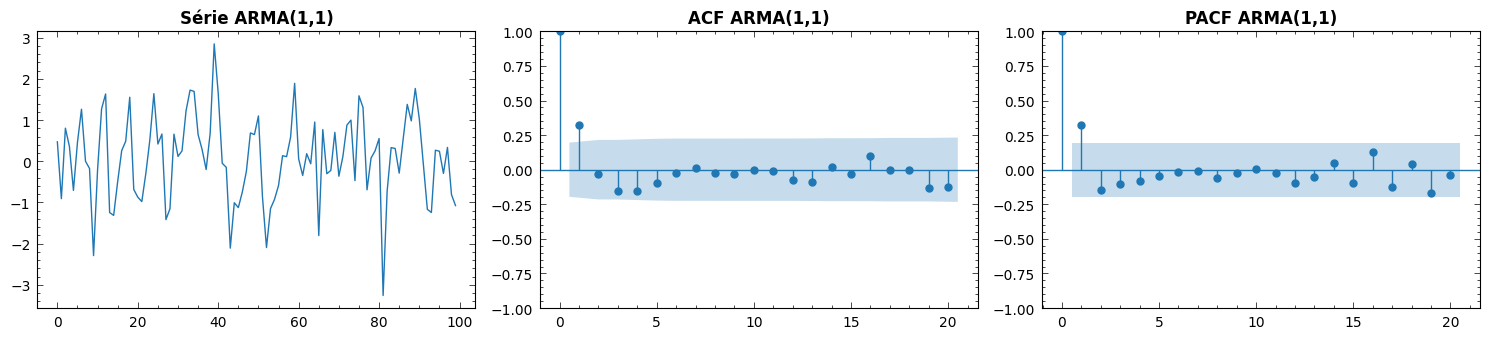

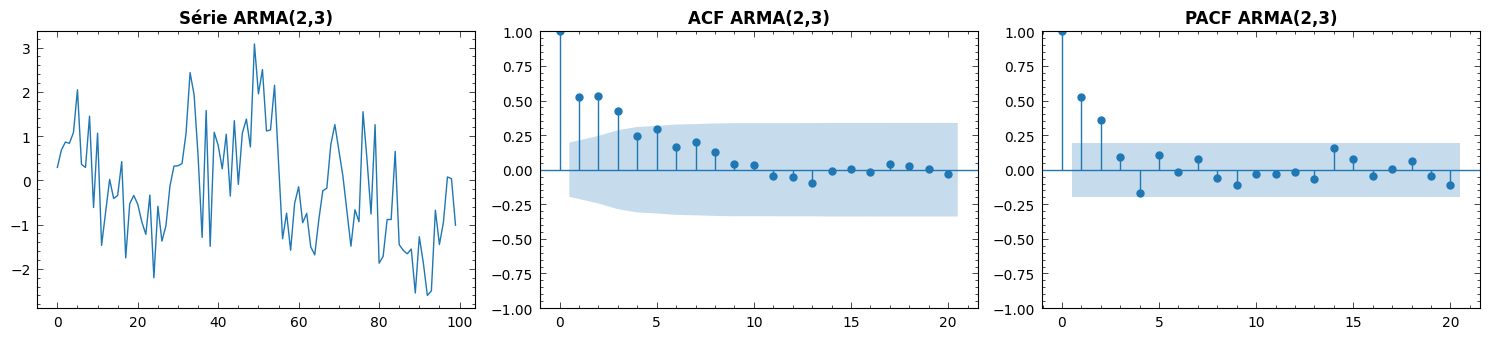

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(1234)

model_name = 'ARMA(1,1)'
ar = np.array([1,-0.3,0,0,0,0]) # list ar_coefs has the form [1, -a_1, -a_2, ..., -a_p]
ma = np.array([1,0.3,0,0,0,0])  # list ma_coefs has the form [1, m_1, m_2, ..., m_q]
ts = arma_generate_sample(ar, ma, nsample=100)
plot_ts_acf_pacf(ts,model_name)

model_name = 'ARMA(2,3)'
ar = np.array([1,-0.4,-0.3,0,0,0])
ma = np.array([1])
ts = arma_generate_sample(ar, ma, nsample=100)
plot_ts_acf_pacf(ts,model_name)

## 3.4. Aplicando um modelo ARIMA

Após uma exploração e entendimento dos dados a aplicação do modelo ARIMA envolve, desse modo, os seguintes passos:

1. **Análise da estacionariedade da série**, e escolha do parâmetro $d$ de diferenciação que torna a série estacionária nos casos em que não é estacionária.
2. **Verificação da autocorrelação e autocorrelação parcial da série**, identificando os potenciais valores $p$ (através da PACF) e $q$ (através da ACF) do modelo.
3. **Análise dos modelos e seleção dos parâmetros**, seguindo alguma métrica de desempenho do modelo como o critério de informação de Akaike (AIC) ou o critério Bayesiano de Schwarz (BIC) $^1$.
4. **Análise dos resíduos**, observando-se a normalidade e independência dos resíduos.
5. **Previsões**, com o modelo selecionado.


$^1$ Note que a escolha de valores $p$ (através do PACF) e $q$ (através ACF) influenciam-se mutuamente e, por exemplo, não pode haver uma autocorrelação parcial de ordem 1 com uma correlação de ordem 0.







### 3.4.1. Análise da estacionariedade da série

Vamos produzir uma série sintética simulando uma série ARIMA(2,1,3). A série original é não estacionária mas a série diferenciada de ordem 1 torna-se estacionária. Obtemos então nosso parâmetro $d=1$.

In [ ]:
#@markdown
def simulate_ARIMA(phi = np.array([0]), theta = np.array([0]), d = 0, t = 0, mu = 0, sigma = 1, n = 20, burn = 10, seed=1):
# adaptado de https://github.com/TOMILO87
    """ Simulate data from ARMA model (eq. 1.2.4):

    z_t = phi_1*z_{t-1} + ... + phi_p*z_{t-p} + a_t + theta_1*a_{t-1} + ... + theta_q*a_{t-q}

    with d unit roots for ARIMA model.

    Arguments:
    phi -- array of shape (p,) or (p, 1) containing phi_1, phi2, ... for AR model
    theta -- array of shape (q) or (q, 1) containing theta_1, theta_2, ... for MA model
    d -- number of unit roots for non-stationary time series
    t -- value deterministic linear trend
    mu -- mean value for normal distribution error term
    sigma -- standard deviation for normal distribution error term
    n -- length time series
    burn -- number of discarded values because series beginns without lagged terms
    seed -- numpy random state

    Return:
    x -- simulated ARMA process of shape (n, 1)

    Reference:
    Time Series Analysis by Box et al.
    """
    np.random.seed(seed)

    # add "theta_0" = 1 to theta
    theta = np.append(1, theta)

    # set max lag length AR model
    p = phi.shape[0]

    # set max lag length MA model
    q = theta.shape[0]

    # simulate n + q error terms
    a = np.random.normal(mu, sigma, (n + max(p, q) + burn, 1))

    # create array for returned values
    x = np.zeros((n + max(p, q) + burn, 1))

    # initialize first time series value
    x[0] = a[0]

    for i in range(1, x.shape[0]):
        AR = np.dot(phi[0 : min(i, p)], np.flip(x[i - min(i, p) : i], 0))
        MA = np.dot(theta[0 : min(i + 1, q)], np.flip(a[i - min(i, q - 1) : i + 1], 0))
        x[i] = AR + MA + t

    # add unit roots
    if d != 0:
        ARMA = x[-n: ]
        m = ARMA.shape[0]
        z = np.zeros((m + 1, 1)) # create temp array

        for i in range(d):
            for j in range(m):
                z[j + 1] = ARMA[j] + z[j]
            ARMA = z[1: ]
        x[-n: ] = z[1: ]

    return x[-n: ]



In [ ]:
df = simulate_ARIMA(phi = np.array([0.8]), theta = np.array([0.6, 0.2]), d=1, n = 100)
df = pd.DataFrame(df.flatten(),columns=['values'])
df.index = pd.date_range(start='6/1/2015', periods = 100, freq='M')
df.head()

,values
2015-06-30,-2.453310
2015-07-31,-3.577104
2015-08-31,-4.972580
2015-09-30,-6.694570
2015-10-31,-9.273456


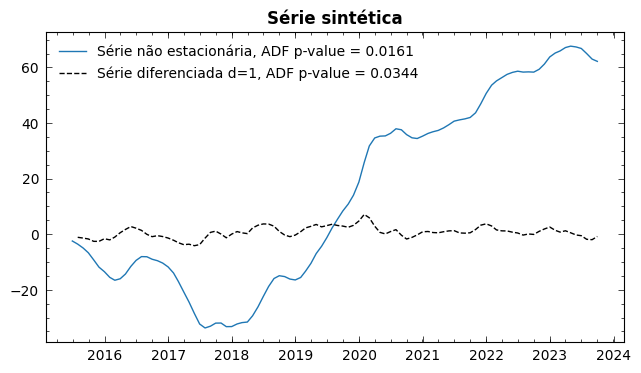

In [ ]:
plt.plot(df, label = 'Série não estacionária, ADF p-value = ' + str(np.round(adfuller(ts)[1],4)))
plt.plot(df.diff(), 'k--', label = 'Série diferenciada d=1, ADF p-value = ' + str(np.round(adfuller(df.diff().dropna())[1],4)))

plt.legend()
plt.title('Série sintética')
plt.show()


### 3.4.2. Verificação da autocorrelação e autocorrelação parcial da série

Os parâmetros $p$ e $q$ são obtidos respectivamente da análise dos gráficos de autocorrelação parcial e autocorrelação, e obtemos assim os valores $p=3$ e $q=3$.

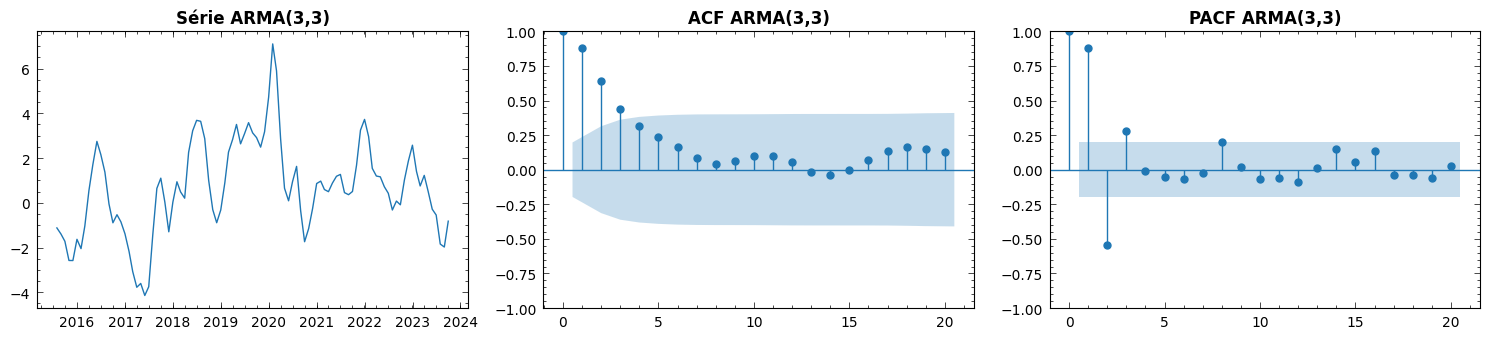

In [ ]:
plot_ts_acf_pacf(df.diff().dropna(),'ARMA(3,3)')

### 3.4.3. Análise dos modelos e seleção dos parâmetros

Podemos então aplicar esses parâmetros e analisar o ajuste da série e métricas do modelo obtido.

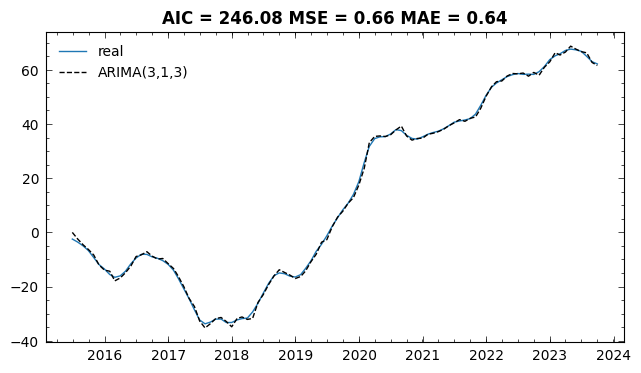

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

p = 3; d = 1; q = 3
model = ARIMA(df, order=(p, d, q))
results = model.fit(method_kwargs={'maxiter':700})

plt.plot(df,label='real')
plt.plot(results.fittedvalues, 'k--', label='ARIMA(' + str(p) + ',' + str(d) + ',' + str(q) + ')')
plt.title(f'AIC = {results.aic:.2f} MSE = {results.mse:.2f} MAE = {results.mae:.2f}')

plt.legend()
plt.show()

O sumário do `statsmodels` fornece uma série de informações para análise do modelo.

In [ ]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                 values   No. Observations:                  100
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -116.041
Date:                Sat, 13 Jan 2024   AIC                            246.083
Time:                        04:16:33   BIC                            264.248
Sample:                    06-30-2015   HQIC                           253.432
                         - 09-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4131      0.357      3.955      0.000       0.713       2.113
ar.L2         -1.2381      0.399     -3.106      0.002      -2.019      -0.457
ar.L3          0.6095      0.198      3.072      0.0

Ele consiste de 3 partes. Na primeira parte há informações gerais do modelo, como ordem do modelo, número de amostras e métricas como o AIC e BIC. Na segunda, há os coeficientes estimados, sua significância e intervalo de confiança. A terceira parte traz indicadores para análise dos resíduos.

Os gráficos das funções PACF e ACF sugerem valores de $p$ e $q$ a serem empregados. Mas podemos buscar alguma métrica de desempenho do modelo, como uma métrica de erro ou o AIC, para busca dos melhores parâmetros.

In [ ]:
warnings.filterwarnings('ignore')
model_list = []; AIC_list = []

d = 1
for p in range(2,5):
  for q in range(2,5):
    model = ARIMA(df, order=(p, d, q))
    results = model.fit(method_kwargs={'maxiter':700})
    model_list.append('ARIMA(' + str(p) + ',' + str(d) + ',' + str(q) + ')')
    AIC_list.append(np.round(results.aic,4))

results_df = pd.DataFrame({'model': model_list, 'AIC': np.array(AIC_list) }).sort_values('AIC',ascending=False)
display(results_df)

warnings.filterwarnings('ignore')

,model,AIC
2,"ARIMA(2,1,4)",248.3544
6,"ARIMA(4,1,2)",247.5014
1,"ARIMA(2,1,3)",247.3347
4,"ARIMA(3,1,3)",246.0826
3,"ARIMA(3,1,2)",246.0429
8,"ARIMA(4,1,4)",245.6695
0,"ARIMA(2,1,2)",245.4423
5,"ARIMA(3,1,4)",245.4241
7,"ARIMA(4,1,3)",244.4067


Assim, para o melhor desempenho pela métrica AIC podemos escolher os valores $p = 2, d = 1, q = 4$ e, então, analisar se os erros obtidos satisfazem as premissas do modelo.

In [ ]:
p = 2; d = 1; q = 4
model = ARIMA(df, order=(p, d, q))
results = model.fit(method_kwargs={'maxiter':700})
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                 values   No. Observations:                  100
Model:                 ARIMA(2, 1, 4)   Log Likelihood                -117.177
Date:                Sat, 13 Jan 2024   AIC                            248.354
Time:                        04:16:37   BIC                            266.520
Sample:                    06-30-2015   HQIC                           255.704
                         - 09-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4308      0.556      2.574      0.010       0.341       2.520
ar.L2         -0.4610      0.464     -0.994      0.320      -1.370       0.448
ma.L1          0.0946      0.562      0.168      0.8

### 3.4.4. Análise dos resíduos

Na parte dos indicadores de resíduos os valores `Prob` correspondem a p-valores das métricas indicadas (no exemplo, p-value Ljung-Box = 0.92 > 0.05 indica que os resíduos são ruído branco e p-value Jarque-Bera = 0.66 > 0.05 indica que os resíduos tem uma distribuição normal).

A análise dos resíduos ainda é normalmente complementada com análise dos gráficos da função `plot_diagnostics()` para, além da normalidade, verificarmos a independência dos valores de erro. No exemplo, como podemos ver, os erros não estão corelacionados.

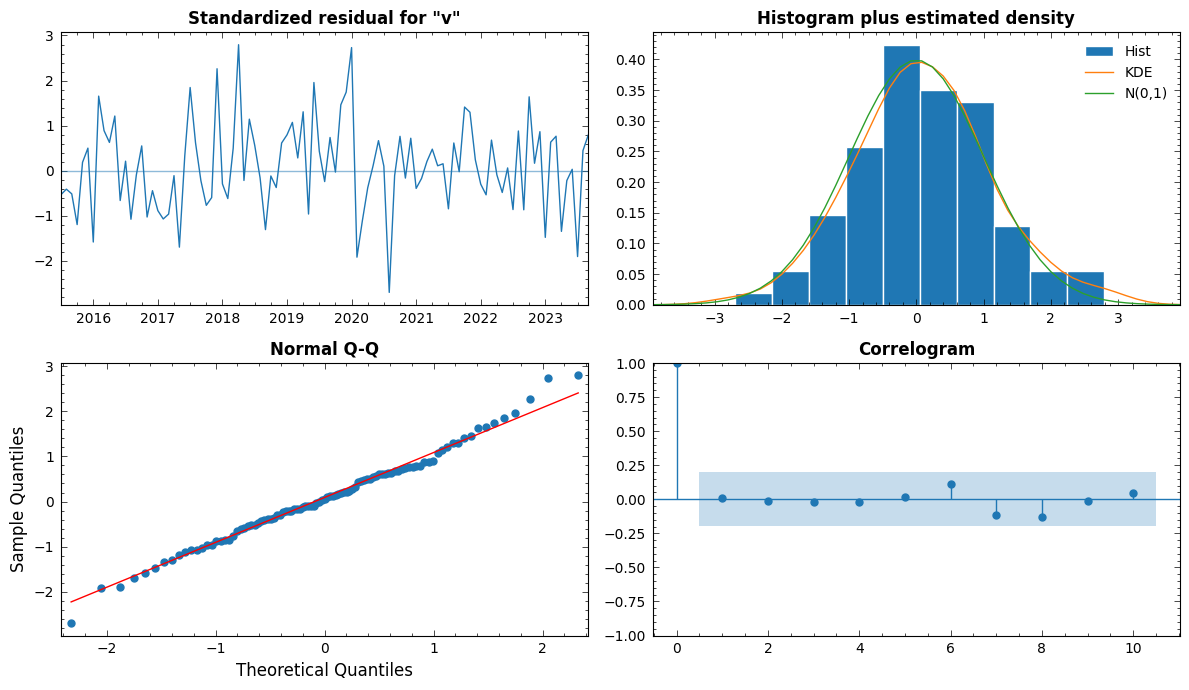

In [ ]:
fig = plt.figure(figsize=(12,7))

results.plot_diagnostics(fig=fig)

plt.tight_layout()
plt.show()

### 3.4.5. Previsões

Uma vez selecionado o modelo podemos fazer previsões de valores futuros da série. Por exemplo, a predição para os próximos 6 meses.


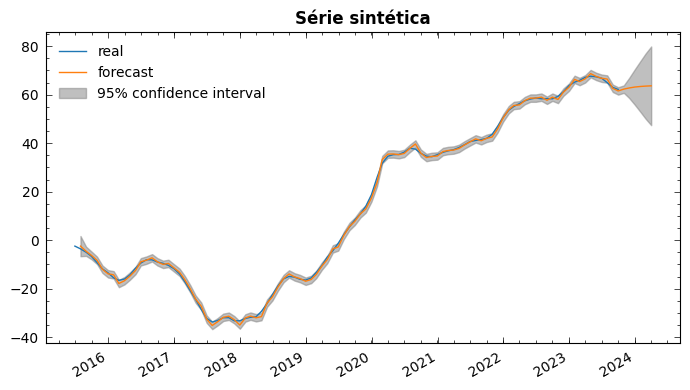

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(df,label='real')
plot_predict(results, start=pd.to_datetime('2015-07-31'), end=pd.to_datetime('2024-03-31'),ax=ax) # alerta: start deve ser ao menos d períodos a frente do início da série
# plot_predict(results, start=1, end=len(ts) + 6,ax=ax) # aqui, funciona o mesmo modo

ax.set_title('Série sintética')
plt.tight_layout()
plt.show()

In [ ]:
results.forecast(6)

2023-10-31    62.313898
2023-11-30    62.791316
2023-12-31    63.171009
2024-01-31    63.401228
2024-02-29    63.555601
2024-03-31    63.670354
Freq: M, Name: predicted_mean, dtype: float64